<a href="https://colab.research.google.com/github/MaYuetong/MaYuetong/blob/main/Zodiac_visualisations_722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


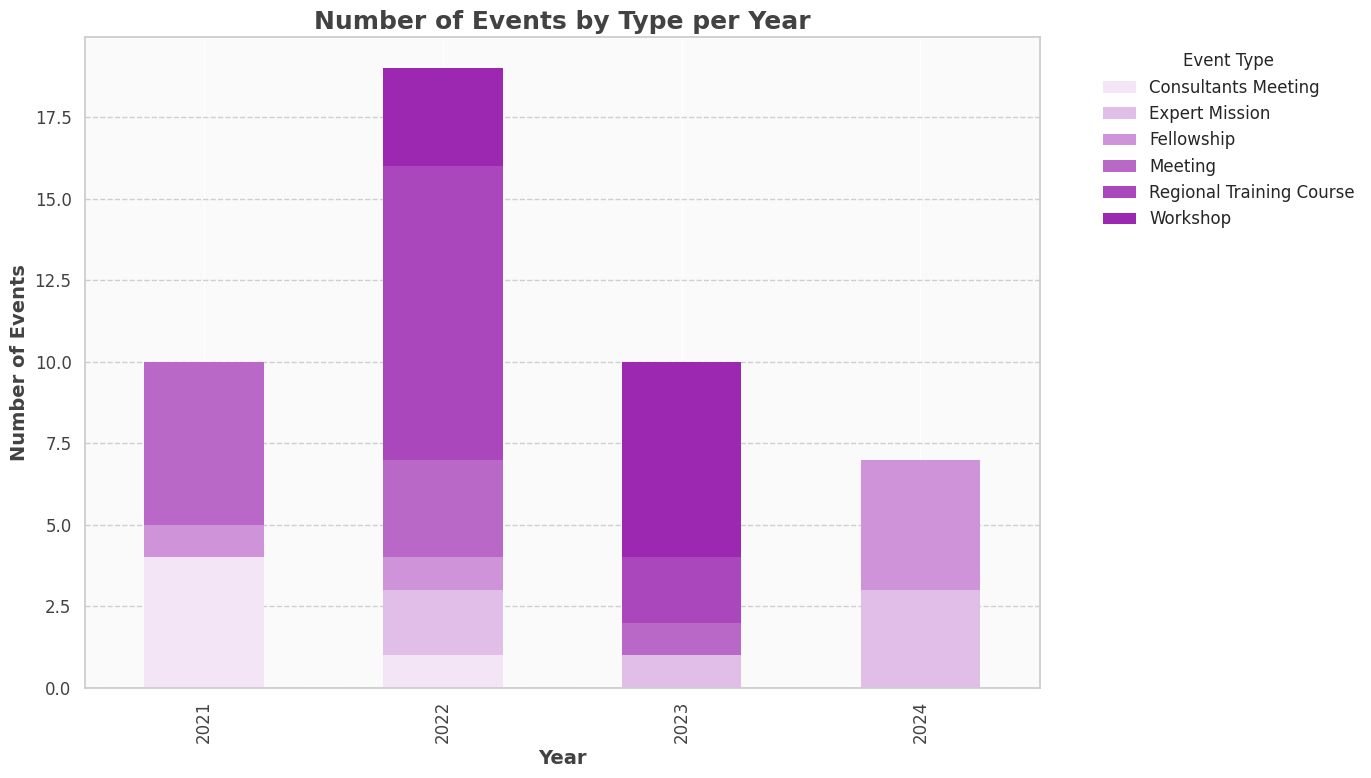

In [ ]:


# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
file_path = '/content/drive/MyDrive/data/20240722 All ZODIAC events.xlsx'
Zodiac_all recipients.xlsx


# Step 3: Convert date columns to datetime format
df['Ev. Start Date'] = pd.to_datetime(df['Ev. Start Date'])
df['Ev. End Date'] = pd.to_datetime(df['Ev. End Date'])

# Step 4: Extract year from start date for easier grouping
df['Ev. Year'] = df['Ev. Start Date'].dt.year

# Step 5: Group by year and event type to count occurrences
event_counts = df.groupby(['Ev. Year', 'Ev. Type']).size().unstack(fill_value=0)

# Step 6: Set Seaborn style and custom color palette based on the provided modern design
sns.set_style("whitegrid")
# Define a gradient color palette in shades of purple
palette = ["#f3e5f5", "#e1bee7", "#ce93d8", "#ba68c8", "#ab47bc", "#9c27b0", "#8e24aa", "#7b1fa2", "#6a1b9a", "#4a148c"]

# Step 7: Plot the data
plt.figure(figsize=(14, 8))
event_counts.plot(kind='bar', stacked=True, color=palette, ax=plt.gca(), edgecolor='none')

# Step 8: Customize the plot with additional design details
plt.title('Number of Events by Type per Year', fontsize=18, weight='bold', color='#424242')
plt.xlabel('Year', fontsize=14, weight='bold', color='#424242')
plt.ylabel('Number of Events', fontsize=14, weight='bold', color='#424242')
plt.xticks(fontsize=12, color='#424242')
plt.yticks(fontsize=12, color='#424242')

# Customize grid lines
plt.grid(axis='x', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#BDBDBD')

# Move legend inside the plot area
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=False)

# Adding a background to the plot
plt.gca().patch.set_facecolor('#FAFAFA')

# Show the plot
plt.tight_layout()
plt.show()




<ipython-input-73-11b6f4218719>:164: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



KeyError: 'North America'

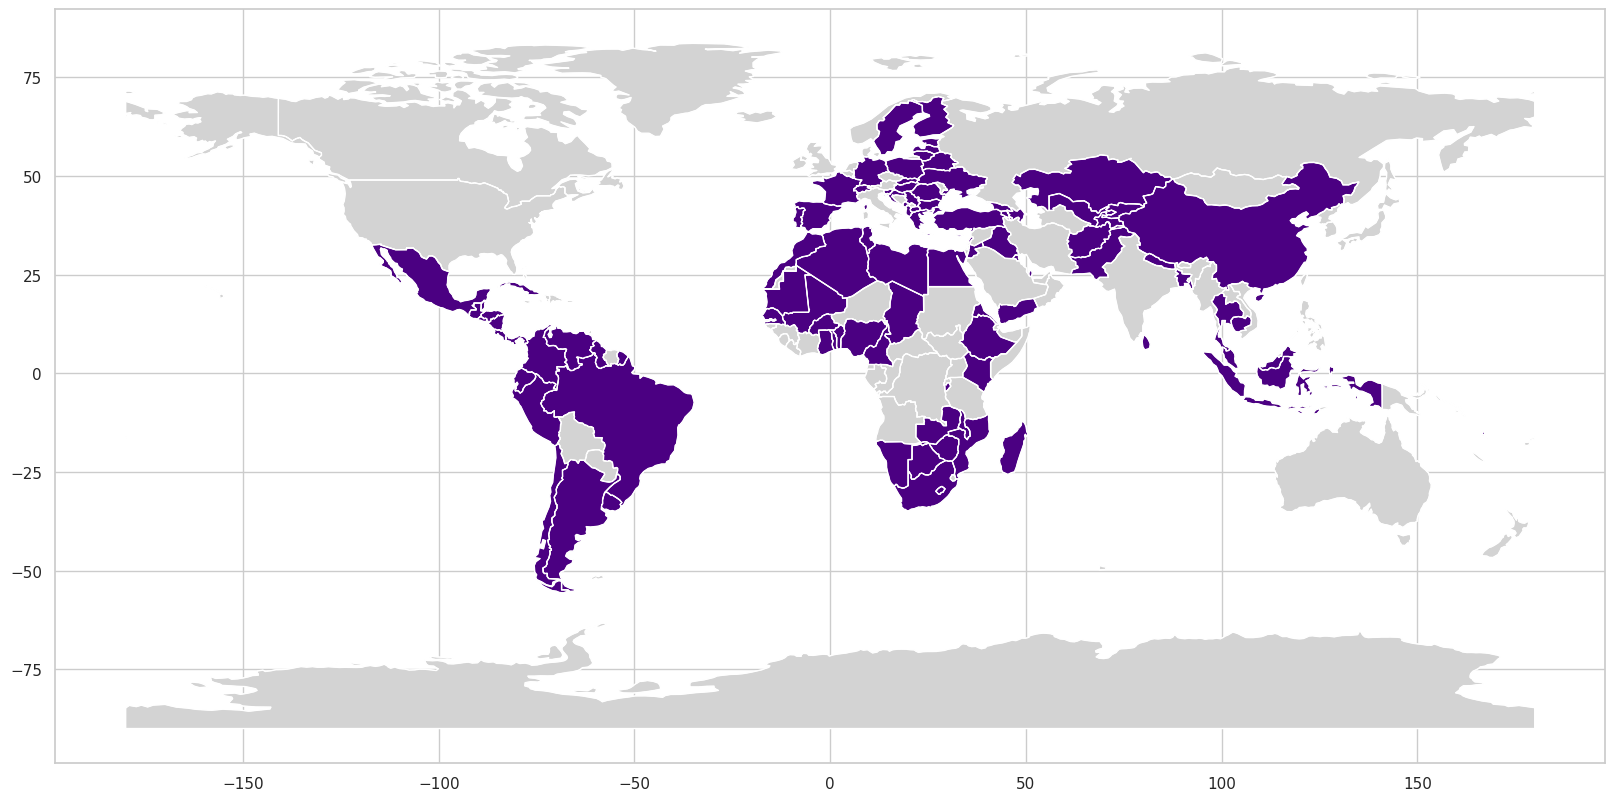

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 更新国家名称和经纬度的静态字典
country_coords = {
    'Central African Republic (the)': (6.6111, 20.9394),
    'South Africa': (-30.5595, 22.9375),
    'Spain': (40.4637, -3.7492),
    'Germany': (51.1657, 10.4515),
    'Cuba': (21.5218, -77.7812),
    'Argentina': (-38.4161, -63.6167),
    'Poland': (51.9194, 19.1451),
    'Botswana': (-22.3285, 24.6849),
    'France': (46.6034, 1.8883),
    'Finland': (61.9241, 25.7482),
    'China': (35.8617, 104.1954),
    'Russian Federation (the)': (61.5240, 105.3188),
    'Thailand': (15.8700, 100.9925),
    'Senegal': (14.4974, -14.4524),
    'Nigeria': (9.0820, 8.6753),
    'Mali': (17.5707, -3.9962),
    'Zimbabwe': (-19.0154, 29.1549),
    'Malaysia': (4.2105, 101.9758),
    'Cameroon': (3.8480, 11.5021),
    'Bangladesh': (23.6850, 90.3563),
    'Afghanistan': (33.9391, 67.7100),
    'Sweden': (60.1282, 18.6435),
    'Serbia': (44.0165, 21.0059),
    'Burundi': (-3.3731, 29.9189),
    'Iran (Islamic Republic of)': (32.4279, 53.6880),
    'Jordan': (30.5852, 36.2384),
    'Kuwait': (29.3117, 47.4818),
    'Kenya': (-0.0236, 37.9062),
    'Latvia': (56.8796, 24.6032),
    'Lithuania': (55.1694, 23.8813),
    'Malta': (35.9375, 14.3754),
    'Uzbekistan': (41.3775, 64.5853),
    'Panama': (8.5380, -80.7821),
    'Qatar': (25.3548, 51.1839),
    'Tanzania, United Republic of': (-6.3690, 34.8888),
    'Chad': (15.4542, 18.7322),
    'Togo': (8.6195, 0.8248),
    'Greece': (39.0742, 21.8243),
    'Georgia': (42.3154, 43.3569),
    'Hungary': (47.1625, 19.5033),
    'Montenegro': (42.7087, 19.3744),
    'Croatia': (45.1000, 15.2000),
    'North Macedonia': (41.6086, 21.7453),
    'Algeria': (28.0339, 1.6596),
    'Nepal': (28.3949, 84.1240),
    'Niger (the)': (17.6078, 8.0817),
    'Bosnia and Herzegovina': (43.9159, 17.6791),
    'Cote d\'Ivoire (Ivory Coast)': (7.539989, -5.54708),
    'Burkina Faso': (12.2383, -1.5616),
    'Ethiopia': (9.1450, 40.4897),
    'Zambia': (-13.1339, 27.8493),
    'Namibia': (-22.9576, 18.4904),
    'Mozambique': (-18.6657, 35.5296),
    'Albania': (41.1533, 20.1683),
    'Sri Lanka': (7.8731, 80.7718),
    'Armenia': (40.0691, 45.0382),
    'Eritrea': (15.1794, 39.7823),
    'Mauritania': (21.0079, -10.9408),
    'Tunisia': (33.8869, 9.5375),
    'Iraq': (33.2232, 43.6793),
    'Colombia': (4.5709, -74.2973),
    'Brazil': (-14.2350, -51.9253),
    'Estonia': (58.5953, 25.0136),
    'Cambodia': (12.5657, 104.9910),
    'Belize': (17.1899, -88.4976),
    'Egypt': (26.8206, 30.8025),
    'Bulgaria': (42.7339, 25.4858),
    'Cyprus': (35.1264, 33.4299),
    'Tajikistan': (38.8610, 71.2761),
    'Kyrgyzstan': (41.2044, 74.7661),
    'Moldova, Republic of': (47.4116, 28.3699),
    'Portugal': (39.3999, -8.2245),
    'Romania': (45.9432, 24.9668),
    'Slovakia': (48.6690, 19.6990),
    'Eswatini (Swaziland)': (-26.5225, 31.4659),
    'Pakistan': (30.3753, 69.3451),
    'Chile': (-35.6751, -71.5430),
    'Uruguay': (-32.5228, -55.7658),
    'Ghana': (7.9465, -1.0232),
    'Libya': (26.3351, 17.2283),
    'Malawi': (-13.2543, 34.3015),
    'Mauritius': (-20.3484, 57.5522),
    'Democratic Republic of Congo': (-4.0383, 21.7587),
    'Mexico': (23.6345, -102.5528),
    'Costa Rica': (9.7489, -83.7534),
    'Viet Nam': (14.0583, 108.2772),
    'Dominican Republic (the)': (18.7357, -70.1627),
    'Ecuador': (-1.8312, -78.1834),
    'El Salvador': (13.7942, -88.8965),
    'Guatemala': (15.7835, -90.2308),
    'Honduras': (15.2000, -86.2419),
    'Nicaragua': (12.8654, -85.2072),
    'Lesotho': (-29.6099, 28.2336),
    'Indonesia': (-0.7893, 113.9213),
    'Ukraine': (48.3794, 31.1656),
    'Belarus': (53.7098, 27.9534),
    'Lebanon': (33.8547, 35.8623),
    'Marshall Islands (the)': (7.1315, 171.1845),
    'Azerbaijan': (40.1431, 47.5769),
    'Sudan (the)': (12.8628, 30.2176),
    'Saint Vincent and the Grenadines': (12.9843, -61.2872),
    'Guyana': (4.8604, -58.9302),
    'Antigua and Barbuda': (17.0608, -61.7964),
    'Kazakhstan': (48.0196, 66.9237),
    'Venezuela': (6.4238, -66.5897),
    'Yemen': (15.5527, 48.5164),
    'Peru': (-9.1900, -75.0152),
    'Syria': (34.8021, 38.9968),
    'Slovenia': (46.1512, 14.9955),
    'Philippines': (12.8797, 121.7740),
    'Benin': (9.3077, 2.3158),
    'Armenia': (40.0691, 45.0382),
    'Madagascar': (-18.7669, 46.8691),
    'Vanuatu': (-15.3767, 166.9592),
    'Saint Lucia': (13.9094, -60.9789),
    'Grenada': (12.1165, -61.6790),
    'Morocco': (31.7917, -7.0926),
    'Switzerland': (46.8182, 8.2275),
    'Turkey': (38.9637, 35.2433),
    'Comoros (the)': (-11.6455, 43.3333),
    'United Kingdom (the)': (55.3781, -3.4360),
    'United States of America (the)': (37.0902, -95.7129),
    'Australia': (-25.2744, 133.7751),
    'Bahamas (the)': (25.0343, -77.3963),
    'Belgium': (50.8503, 4.3517),
    'Bolivia': (-16.2902, -63.5887),
    'New Zealand': (-40.9006, 174.8860),
    'Netherlands (the)': (52.1326, 5.2913),
    'Singapore': (1.3521, 103.8198),
    'Saudi Arabia': (23.8859, 45.0792),
    'Italy': (41.8719, 12.5674),
    'India': (20.5937, 78.9629),
    'Japan': (36.2048, 138.2529),
    'Israel': (31.0461, 34.8516),
    'Ireland': (53.1424, -7.6921),
    'Myanmar': (21.9162, 95.9560),
    'Uganda': (1.3733, 32.2903),
}

# 读取数据文件
file_path = '/content/drive/MyDrive/data/20240722 ZNL.xlsx'
df = pd.read_excel(file_path)

# 使用静态字典获取国家的地理坐标，如果未找到则返回 (None, None)
df['Latitude'], df['Longitude'] = zip(*df['Country Name'].map(lambda x: country_coords.get(x, (None, None))))

# 过滤掉无法获取坐标的国家
df = df.dropna(subset=['Latitude', 'Longitude'])

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 绘制地理分布图
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
world.boundary.plot(ax=ax, linewidth=0.6, color='white')
world.plot(ax=ax, color='#d3d3d3')  # 灰色

# 标注有实验室的国家
highlighted_countries = df['Country Name'].unique()
highlighted_gdf = world[world['name'].isin(highlighted_countries)]
highlighted_gdf.plot(ax=ax, color='#4b0082')  # 深紫色

# 每个大洲的实验室数量
continent_counts = {
    'Africa': 43,
    'Asia and the Pacific': 25,
    'Europe': 37,
    'Americas': 23
}

# 在地图上显示大洲的国家数量
for continent, (x, y) in {
    'North America': (-100, 45),
    'Asia and the Pacific': (100, 10),
    'Europe': (10, 50),
    'Africa': (20, 0),
    'Latin America': (-60, -10)
}.items():
    bubble_size = continent_counts[continent] * 5  # 调整气泡大小
    ax.add_patch(plt.Circle((x, y), bubble_size, color='#dda0dd', alpha=0.5, ec='none'))
    plt.text(x, y, f"{continent}\n{continent_counts[continent]}", fontsize=16, color='black', ha='center', va='center', weight='bold')

# 绘制大洲的总数据信息
total_text = (
    "•128 Member States nominated a ZODIAC National Laboratory (ZNL)\n"
    "(Africa: 43; Asia- Pacific: 25; Europe: 37; Americas: 23)"
)
plt.text(-180, -80, total_text, fontsize=18, color='black', ha='left', va='center', weight='bold')

plt.title('Geographical Distribution of Participants', size=24, weight='bold')
plt.show()

# 绘制词云
country_counts = df['Country Name'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      color_func=lambda *args, **kwargs: '#ff9900',
                      max_font_size=100, min_font_size=20).generate_from_frequencies(country_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distribution of Participants by Country', size=24, weight='bold')
plt.show()



In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.5 MB/s eta 0:00:00


<ipython-input-56-f2688d88a1bb>:71: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


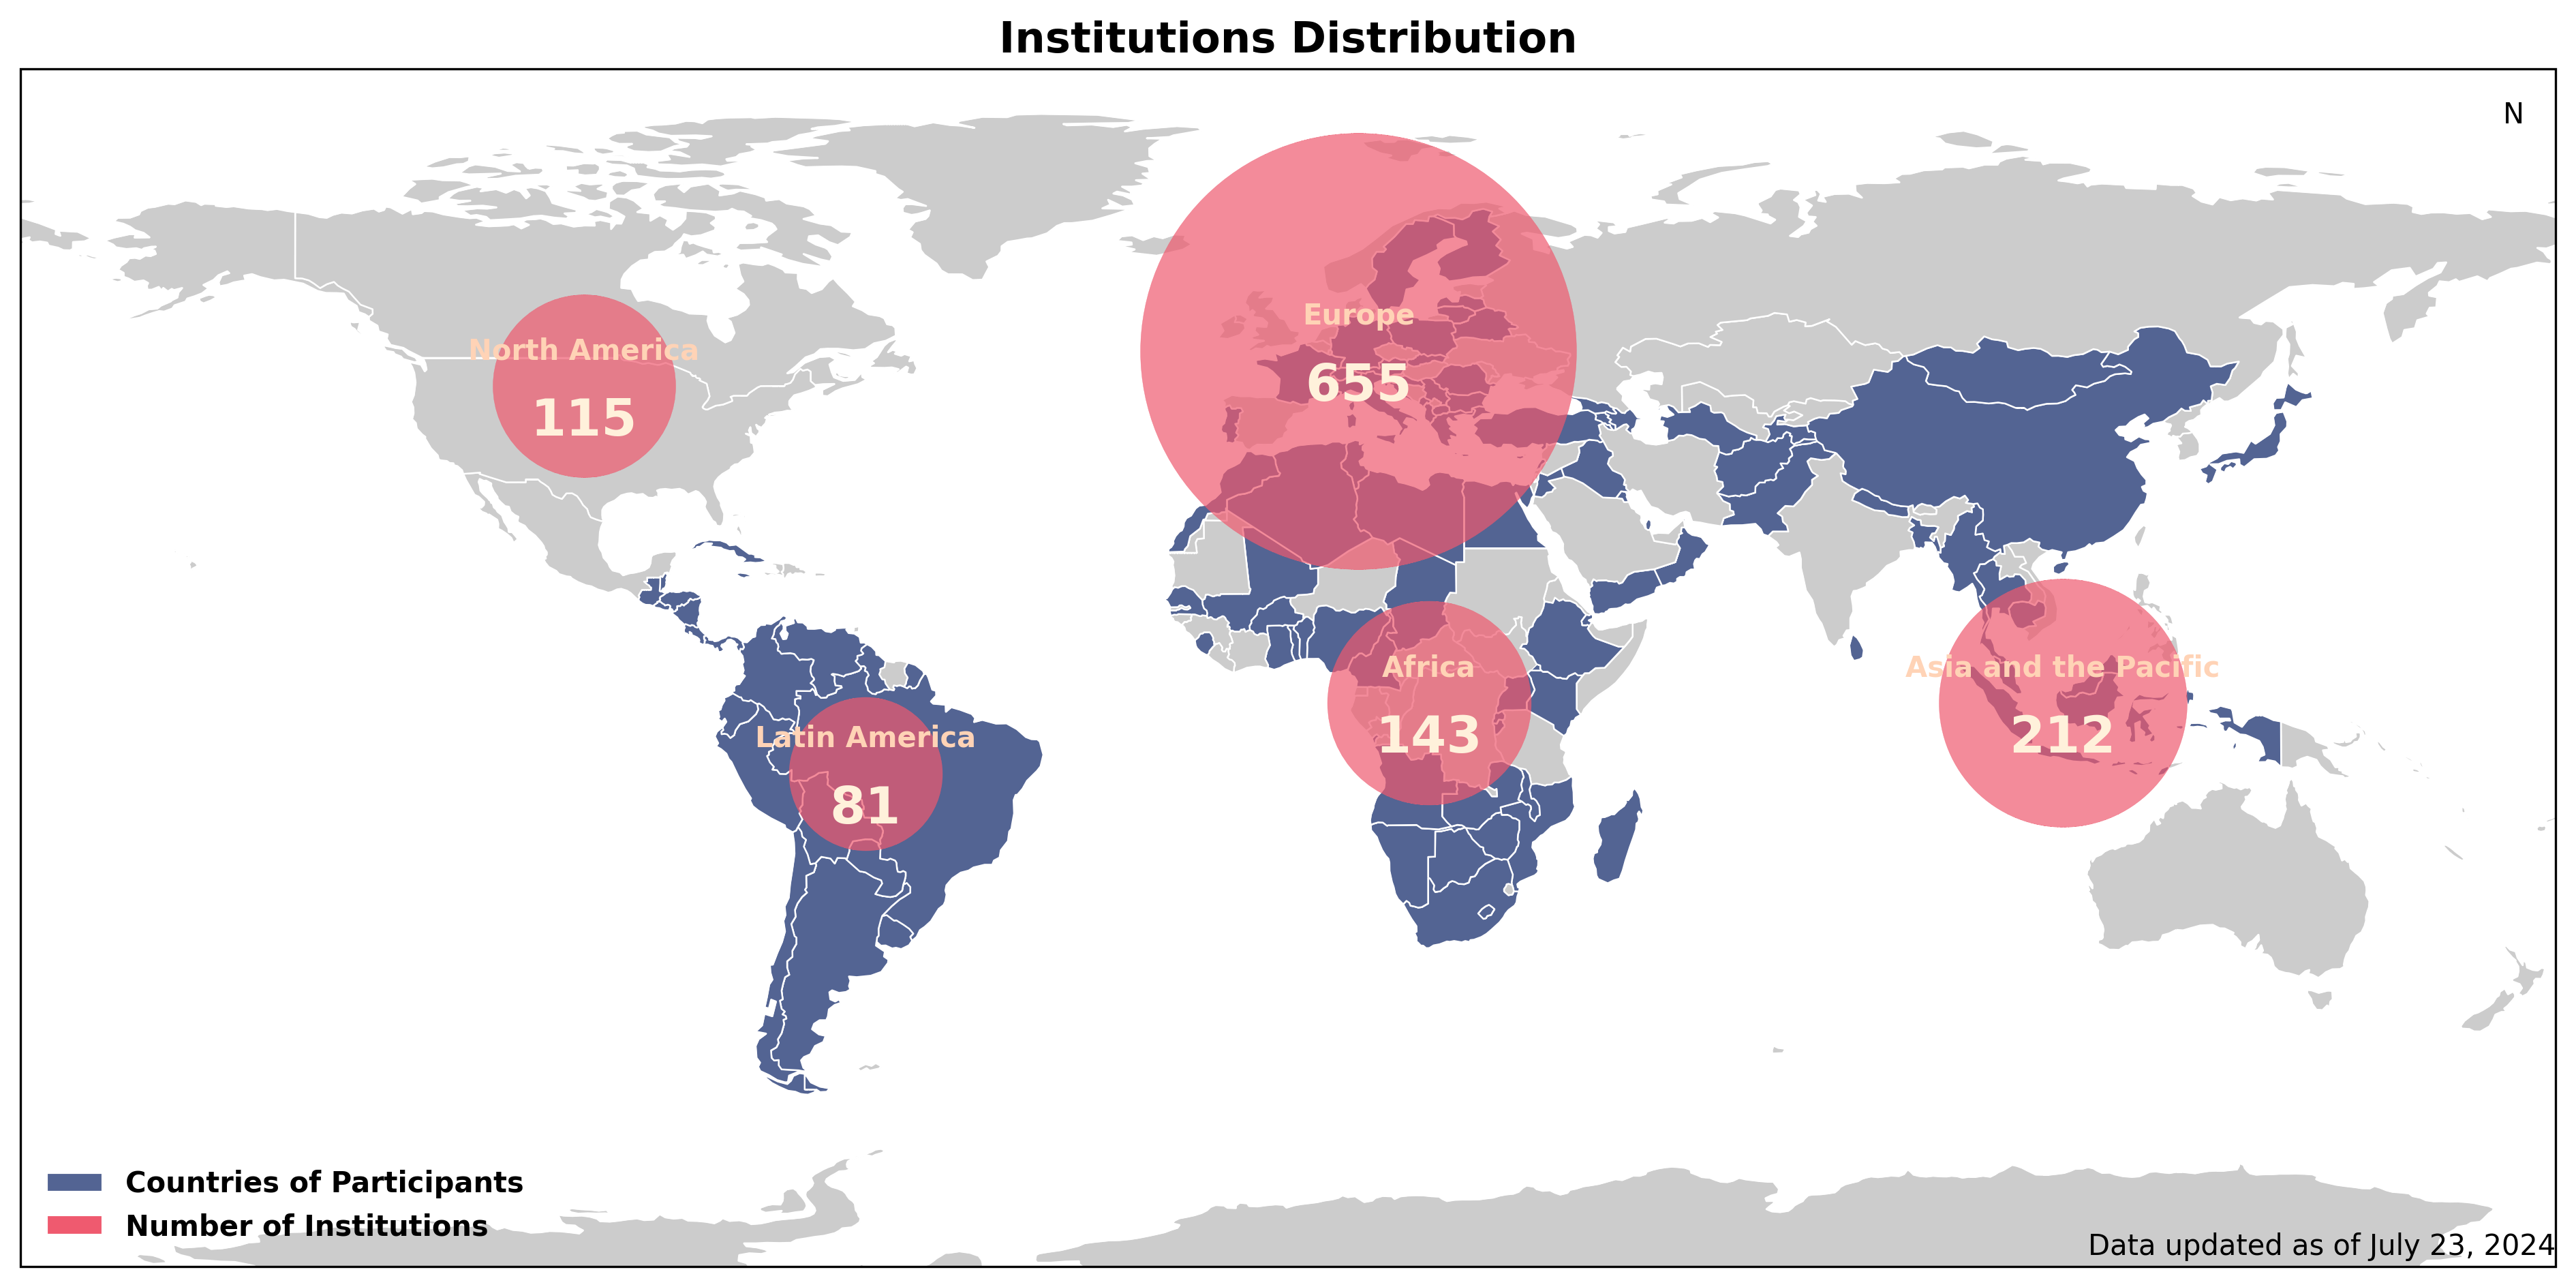

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch, Circle
from matplotlib.font_manager import FontProperties

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 读取新的Excel文件
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# 移除'NaN'值行
df = df.dropna(subset=['Institution Latitude', 'Institution Longitude'])

# 函数：根据经纬度分类区域
def classify_region(lon, lat):
    if lon < -30:
        if lat > 0:
            return 'North America'
        else:
            return 'Latin America'
    elif lon > 60:
        return 'Asia and the Pacific'
    elif -30 <= lon <= 60 and lat > 0:
        return 'Europe'
    elif lon >= -30 and lon <= 60 and lat < 0:
        return 'Africa'
    else:
        return 'Other'

# 应用分类函数
df['Region'] = df.apply(lambda row: classify_region(row['Institution Longitude'], row['Institution Latitude']), axis=1)

# 计算每个区域的机构数量
region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# 定义每个区域的坐标
region_coords = {
    'North America': (-100, 45),
    'Asia and the Pacific': (110, 0),
    'Europe': (10, 50),
    'Africa': (20, 0),
    'Latin America': (-60, -10)
}

# 定义气泡和文本颜色
bubble_color = '#EF5A6F'
text_color = '#FFD3B6'
highlighted_country_color = '#536493'
default_country_color = '#cccccc'
text_color2 = '#FFF1DB'

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Institution Longitude'], df['Institution Latitude']))

# 设置坐标系统为WGS84
gdf.set_crs(epsg=4326, inplace=True)

# 获取包含机构的国家列表
countries_with_institutions = df['Country Name'].unique()

# 加载国家的自然地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 在世界GeoDataFrame中创建一个新列存储颜色
world['color'] = default_country_color

# 更新包含机构的国家的颜色
world.loc[world['name'].isin(countries_with_institutions), 'color'] = highlighted_country_color

# 创建一个新的投影图
fig, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# 使用指定颜色绘制国家
for _, row in world.iterrows():
    ax.add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=row['color'], edgecolor='white', linewidth=0.3)

# 绘制基础世界地图，使用白色海岸线和边界，填充陆地为浅色
ax.add_feature(cfeature.LAND, facecolor=default_country_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)

# 绘制每个区域的气泡
for (region, (x, y)) in region_coords.items():
    count = region_counts.loc[region_counts['Region'] == region, 'Count'].values[0]
    ax.scatter(x, y, s=count*36, color=bubble_color, transform=ccrs.PlateCarree(), alpha=0.7, edgecolors=bubble_color, linewidth=0.1, zorder=5)

    # 添加区域名称
    ax.text(x, y + 5, region, color=text_color, fontsize=10, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))
    # 添加数量
    ax.text(x, y - 5, f'{count}', color=text_color2, fontsize=18, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))

# 设置显示范围以聚焦北半球
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())

# 添加图例
legend_elements = [
    Patch(facecolor=highlighted_country_color, edgecolor='white', label='Countries of Participants'),
    Circle((0, 0), radius=10, facecolor=bubble_color, edgecolor='white', label='Number of Institutions')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize='large', frameon=False, prop=FontProperties(weight='bold'))

# 添加专业北箭头
north_arrow = AnchoredText('N', loc='upper right', frameon=False, pad=0.6, borderpad=0.5)
ax.add_artist(north_arrow)
arrow_props = dict(facecolor='white', edgecolor='white', width=6, headwidth=12, headlength=10)
ax.annotate('', xy=(0.97, 0.97), xytext=(0.97, 0.92),
            arrowprops=arrow_props, xycoords='axes fraction', ha='center', va='center')

# 标题和标签
plt.title('Institutions Distribution', size=15, weight='bold')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# 添加更新日期
update_text = 'Data updated as of July 23, 2024'
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()


<ipython-input-66-90bd82e9f8c7>:92: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


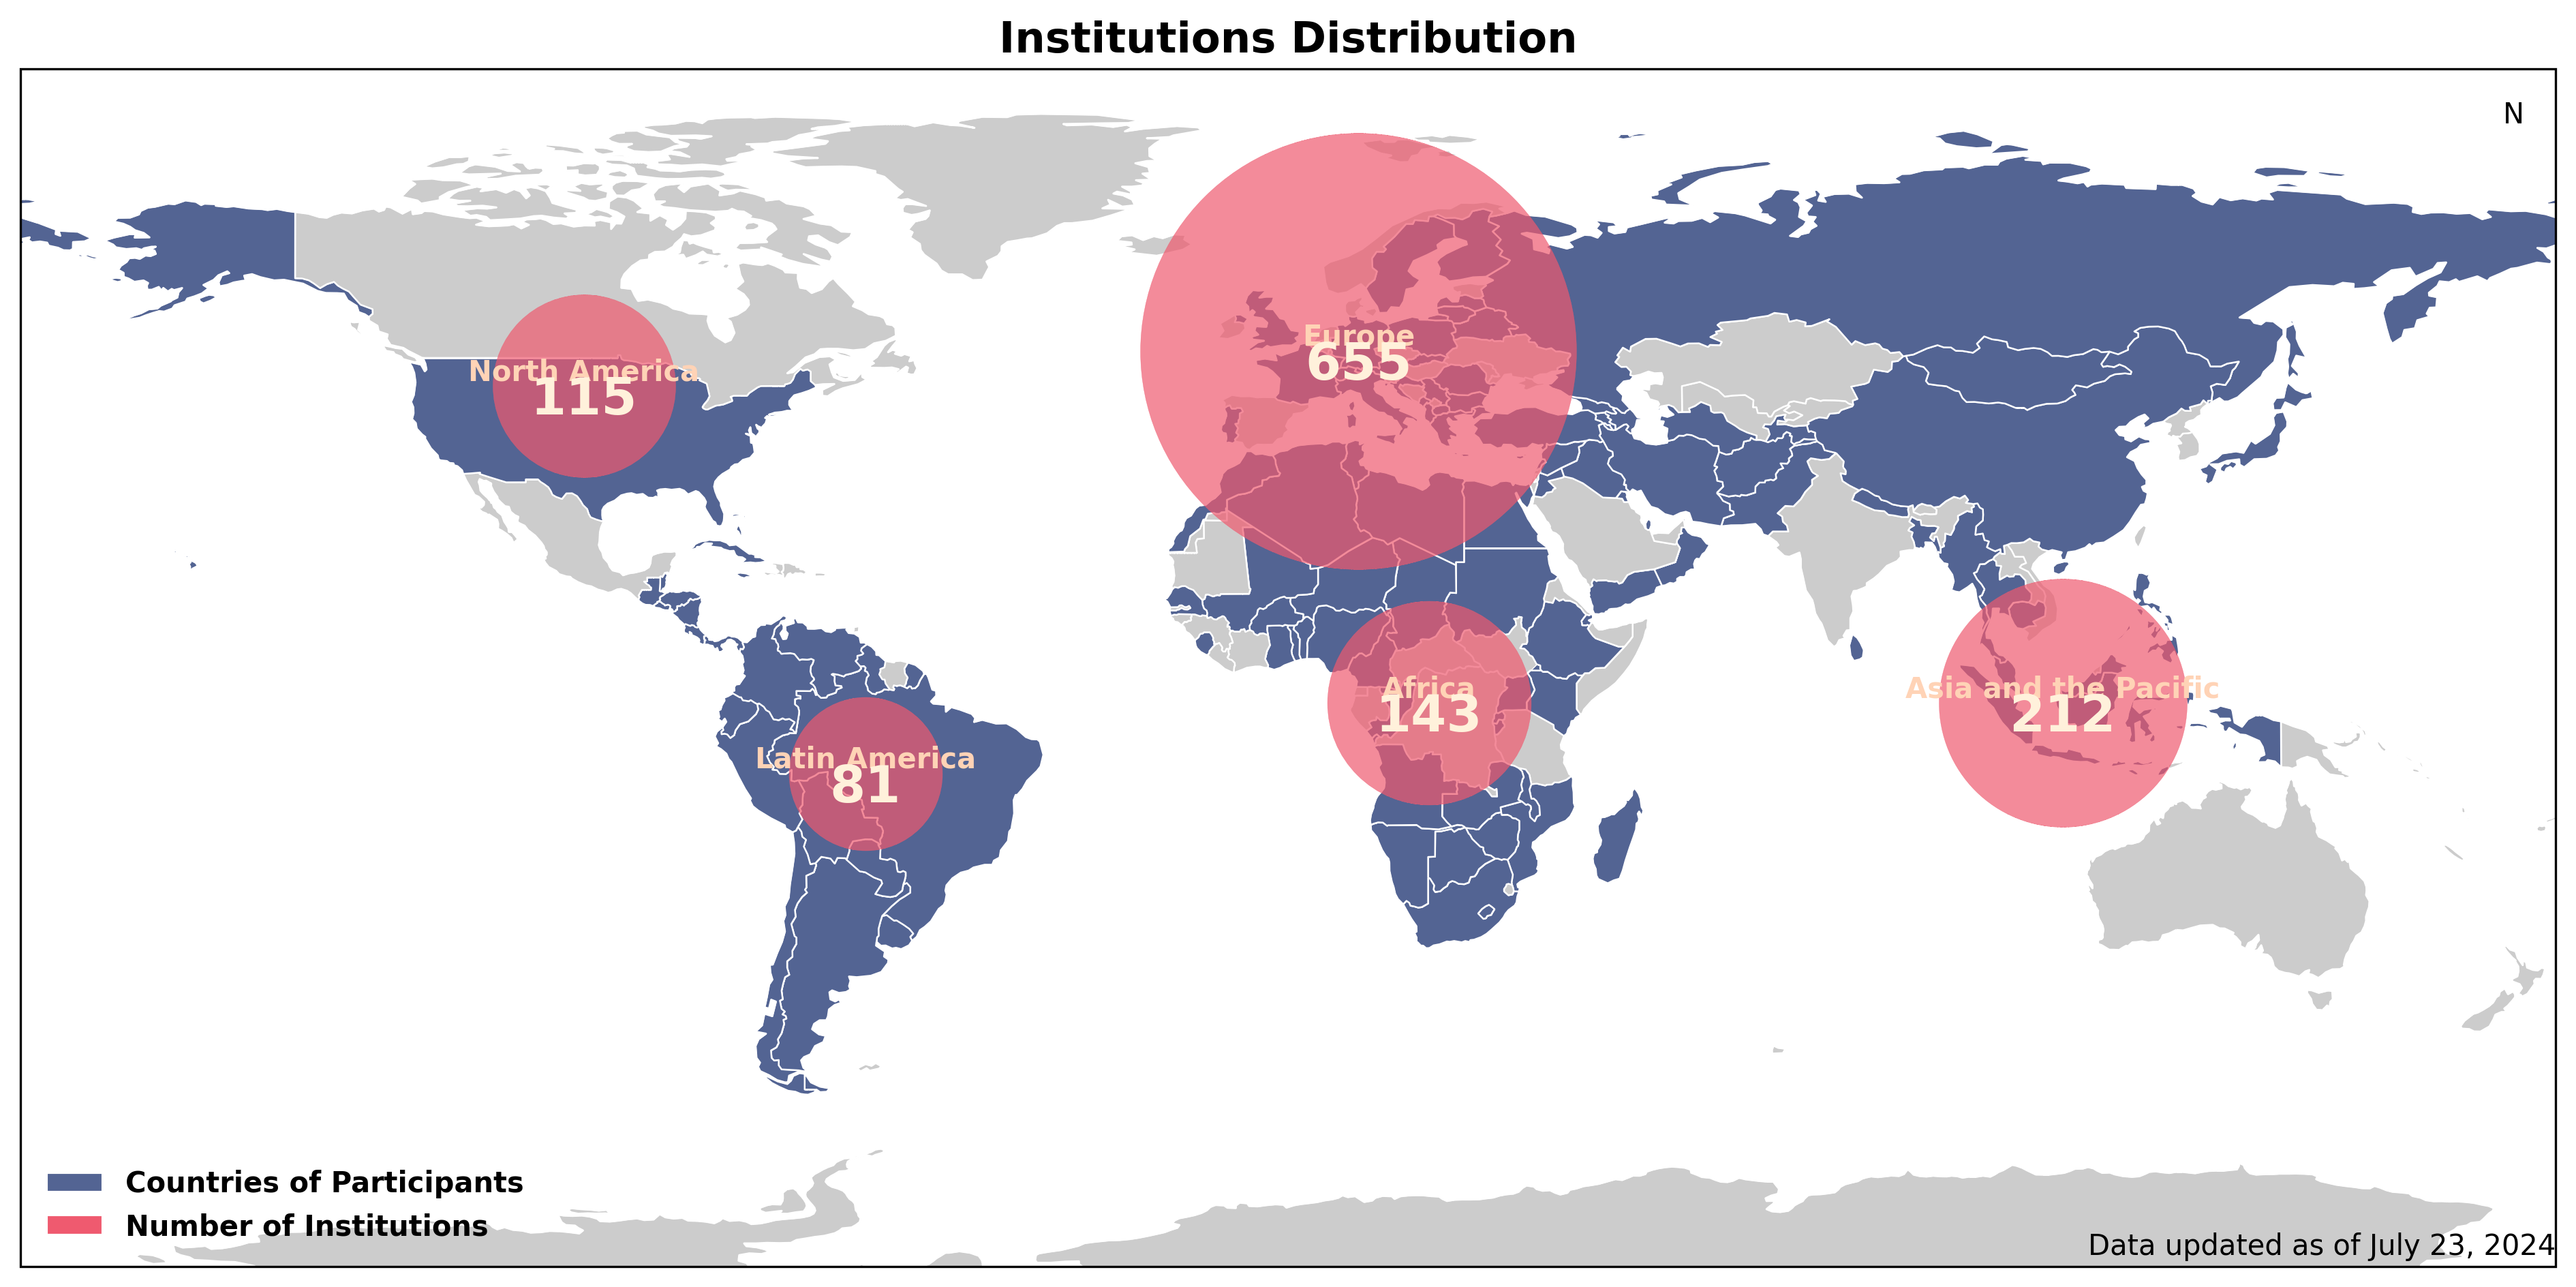

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch, Circle
from matplotlib.font_manager import FontProperties
import re

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 读取新的Excel文件
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# 移除'NaN'值行
df = df.dropna(subset=['Institution Latitude', 'Institution Longitude'])

# 函数：根据经纬度分类区域
def classify_region(lon, lat):
    if lon < -30:
        if lat > 0:
            return 'North America'
        else:
            return 'Latin America'
    elif lon > 60:
        return 'Asia and the Pacific'
    elif -30 <= lon <= 60 and lat > 0:
        return 'Europe'
    elif lon >= -30 and lon <= 60 and lat < 0:
        return 'Africa'
    else:
        return 'Other'

# 应用分类函数
df['Region'] = df.apply(lambda row: classify_region(row['Institution Longitude'], row['Institution Latitude']), axis=1)

# 标准化国家名称
def standardize_country_name(name):
    # 将非字符串类型转换为字符串
    name = str(name)
    # 去掉括号及其内容
    name = re.sub(r'\(.*?\)', '', name).strip()
    # 手动修正一些常见的国家名称变体
    corrections = {
        'Cote d\'Ivoire': 'Ivory Coast',
        'United States of America': 'United States',
        'Eswatini': 'Swaziland',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Russian Federation': 'Russia',
        'United Republic of Tanzania': 'Tanzania'
    }
    return corrections.get(name, name)

df['Country Name'] = df['Country Name'].apply(standardize_country_name)

# 计算每个区域的机构数量
region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# 定义每个区域的坐标
region_coords = {
    'North America': (-100, 45),
    'Asia and the Pacific': (110, 0),
    'Europe': (10, 50),
    'Africa': (20, 0),
    'Latin America': (-60, -10)
}

# 定义气泡和文本颜色
bubble_color = '#EF5A6F'
text_color = '#FFD3B6'
highlighted_country_color = '#536493'
default_country_color = '#cccccc'
text_color2 = '#FFF1DB'

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Institution Longitude'], df['Institution Latitude']))

# 设置坐标系统为WGS84
gdf.set_crs(epsg=4326, inplace=True)

# 获取包含机构的国家列表
countries_with_institutions = df['Country Name'].unique()

# 加载国家的自然地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 在世界GeoDataFrame中创建一个新列存储颜色
world['color'] = default_country_color

# 更新包含机构的国家的颜色
world['name'] = world['name'].apply(standardize_country_name)
world.loc[world['name'].isin(countries_with_institutions), 'color'] = highlighted_country_color

# 创建一个新的投影图
fig, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# 使用指定颜色绘制国家
for _, row in world.iterrows():
    ax.add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=row['color'], edgecolor='white', linewidth=0.3)

# 绘制基础世界地图，使用白色海岸线和边界，填充陆地为浅色
ax.add_feature(cfeature.LAND, facecolor=default_country_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)

# 绘制每个区域的气泡
for (region, (x, y)) in region_coords.items():
    count = region_counts.loc[region_counts['Region'] == region, 'Count'].values[0]
    ax.scatter(x, y, s=count*36, color=bubble_color, transform=ccrs.PlateCarree(), alpha=0.7, edgecolors=bubble_color, linewidth=0.1, zorder=5)

    # 添加区域名称
    ax.text(x, y + 2, region, color=text_color, fontsize=10, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))
    # 添加数量
    ax.text(x, y - 2, f'{count}', color=text_color2, fontsize=18, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))

# 设置显示范围以聚焦北半球
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())

# 添加图例
legend_elements = [
    Patch(facecolor=highlighted_country_color, edgecolor='white', label='Countries of Participants'),
    Circle((0, 0), radius=10, facecolor=bubble_color, edgecolor='white', label='Number of Institutions')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize='large', frameon=False, prop=FontProperties(weight='bold'))

# 添加专业北箭头
north_arrow = AnchoredText('N', loc='upper right', frameon=False, pad=0.6, borderpad=0.5)
ax.add_artist(north_arrow)
arrow_props = dict(facecolor='white', edgecolor='white', width=6, headwidth=12, headlength=10)
ax.annotate('', xy=(0.97, 0.97), xytext=(0.97, 0.92),
            arrowprops=arrow_props, xycoords='axes fraction', ha='center', va='center')

# 标题和标签
plt.title('Institutions Distribution', size=15, weight='bold')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# 添加更新日期
update_text = 'Data updated as of July 23, 2024'
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()


<ipython-input-79-e6f105ee1b5d>:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Missing countries in map data: {'Singapore', 'Tanzania, United Republic of', 'Democratic Republic of Congo', 'Mauritius', 'Marshall Islands', 'Central African Republic', 'Comoros', 'Saint Lucia', 'Dominican Republic', 'Antigua and Barbuda', 'Brunei Darussalam', 'Swaziland', 'Seychelles', 'Malta', 'Viet Nam', 'Moldova, Republic of', 'Bosnia and Herzegovina', 'Saint Vincent and Grenadines', 'Ivory Coast', 'nan', 'Bahrain'}


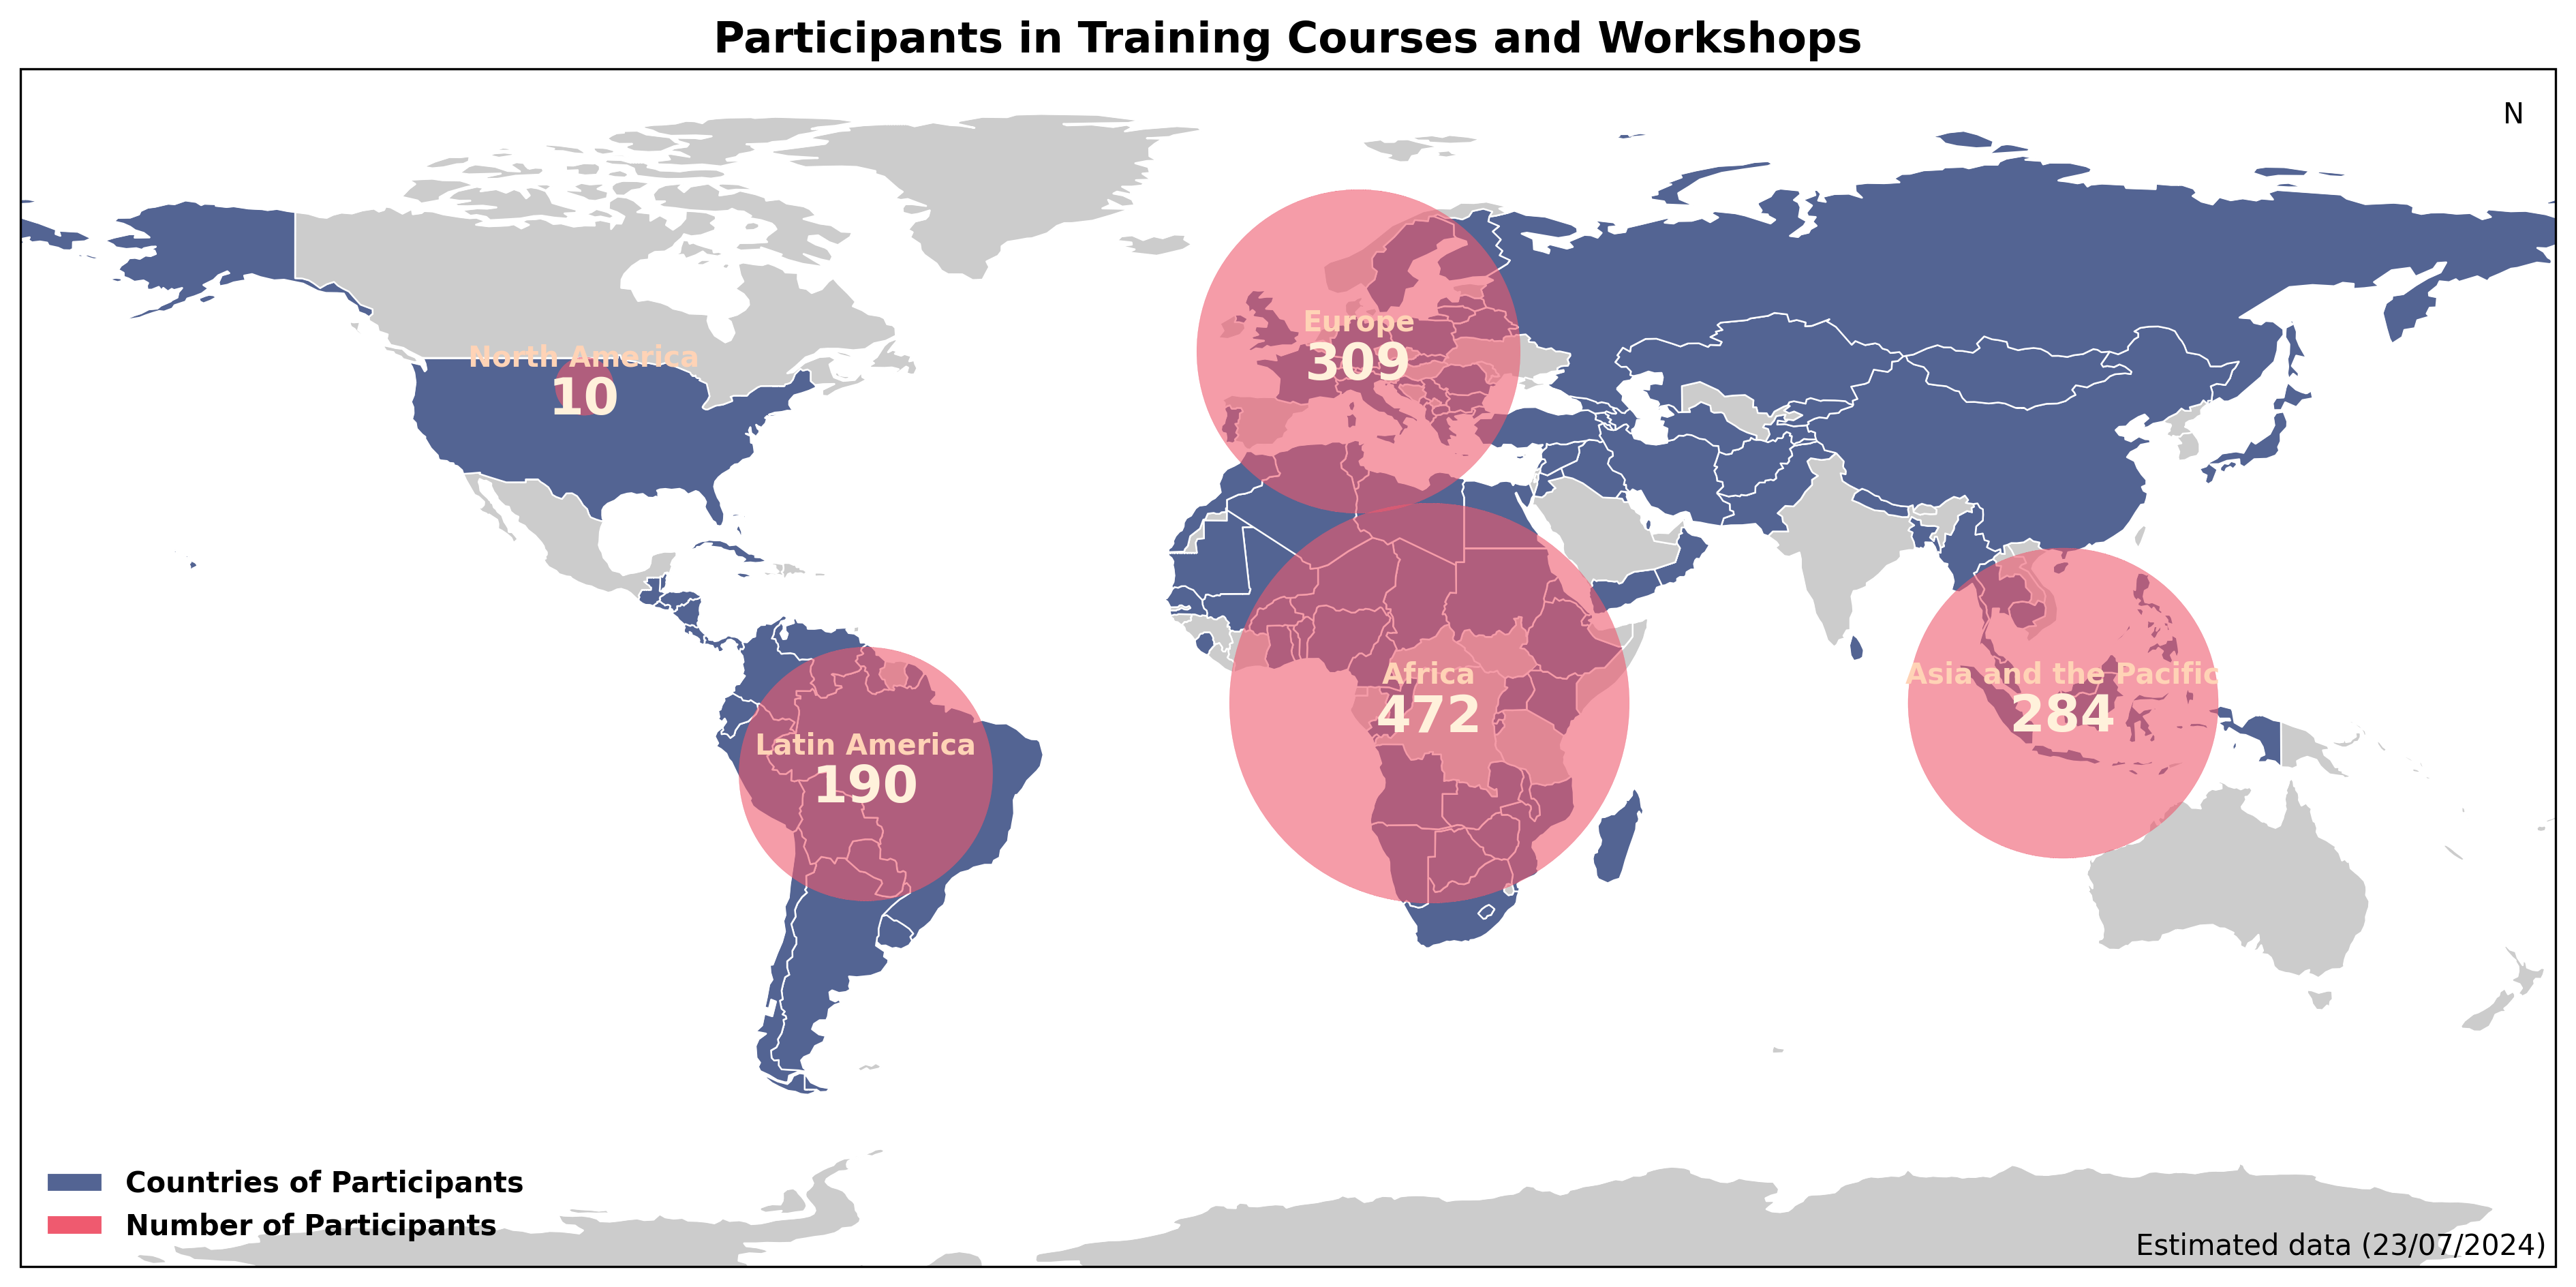

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch, Circle
from matplotlib.font_manager import FontProperties
import re

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 读取新的Excel文件
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# 标准化国家名称
def standardize_country_name(name):
    # 将非字符串类型转换为字符串
    name = str(name)
    # 去掉括号及其内容
    name = re.sub(r'\(.*?\)', '', name).strip()
    # 手动修正一些常见的国家名称变体
    corrections = {
        'Cote d\'Ivoire': 'Ivory Coast',
        'United States of America': 'United States',
        'Eswatini': 'Swaziland',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Russian Federation': 'Russia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Bolivia (Plurinational State of)': 'Bolivia'
    }
    return corrections.get(name, name)

df['Country Name'] = df['Country Name'].apply(standardize_country_name)

# 获取包含机构的国家列表
countries_with_institutions = df['Country Name'].unique()

# 加载国家的自然地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 在世界GeoDataFrame中创建一个新列存储颜色
world['color'] = default_country_color = '#cccccc'

# 更新包含机构的国家的颜色
world['name'] = world['name'].apply(standardize_country_name)
highlighted_country_color = '#536493'
world.loc[world['name'].isin(countries_with_institutions), 'color'] = highlighted_country_color

# 检查哪些国家没有被正确着色
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries in map data:", missing_countries)

# 计算每个区域的机构数量
region_counts = df['Iaea Region Name'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# 定义每个区域的坐标
region_coords = {
    'Africa': (20, 0),
    'Asia and the Pacific': (110, 0),
    'Europe': (10, 50),
    'Latin America': (-60, -10),
    'North America': (-100, 45)
}

# 定义气泡和文本颜色
bubble_color = '#EF5A6F'
text_color = '#FFD3B6'
text_color2 = '#FFF1DB'

# 创建一个新的投影图
fig, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# 使用指定颜色绘制国家
for _, row in world.iterrows():
    ax.add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=row['color'], edgecolor='white', linewidth=0.3)

# 绘制基础世界地图，使用白色海岸线和边界，填充陆地为浅色
ax.add_feature(cfeature.LAND, facecolor=default_country_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)

# 绘制每个区域的气泡
for (region, (x, y)) in region_coords.items():
    count = region_counts.loc[region_counts['Region'] == region, 'Count'].values[0] if region in region_counts['Region'].values else 0
    ax.scatter(x, y, s=count*42, color=bubble_color, transform=ccrs.PlateCarree(), alpha=0.6, edgecolors=bubble_color, linewidth=0.1, zorder=5)

    # 添加区域名称
    ax.text(x, y + 4, region, color=text_color, fontsize=10, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))
    # 添加数量
    ax.text(x, y - 2, f'{count}', color=text_color2, fontsize=18, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))

# 设置显示范围以聚焦北半球
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())

# 添加图例
legend_elements = [
    Patch(facecolor=highlighted_country_color, edgecolor='white', label='Countries of Participants'),
    Circle((0, 0), radius=10, facecolor=bubble_color, edgecolor='white', label='Number of Participants')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize='large', frameon=False, prop=FontProperties(weight='bold'))

# 添加专业北箭头
north_arrow = AnchoredText('N', loc='upper right', frameon=False, pad=0.6, borderpad=0.5)
ax.add_artist(north_arrow)
arrow_props = dict(facecolor='white', edgecolor='white', width=6, headwidth=12, headlength=10)
ax.annotate('', xy=(0.97, 0.97), xytext=(0.97, 0.92),
            arrowprops=arrow_props, xycoords='axes fraction', ha='center', va='center')

# 标题和标签
plt.title('Participants in Training Courses and Workshops', size=15, weight='bold')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()


<ipython-input-86-74249c673d19>:60: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Missing countries in map data before replacements: {'Brunei Darussalam', 'Saint Vincent and Grenadines', 'Russian Federation', 'Democratic Republic of Congo', 'Bosnia and Herzegovina', 'nan', 'Bahrain', 'Seychelles', 'Mauritius', 'Central African Republic', 'Malta', 'Saint Lucia', 'Singapore', 'Comoros', 'Antigua and Barbuda', 'Ivory Coast', 'Dominican Republic', 'Marshall Islands'}
Missing countries after replacements: {'Brunei Darussalam', 'Saint Vincent and Grenadines', 'Russian Federation', 'Democratic Republic of Congo', 'Bosnia and Herzegovina', 'nan', 'Bahrain', 'Seychelles', 'Mauritius', 'Central African Republic', 'Malta', 'Saint Lucia', 'Singapore', 'Comoros', 'Antigua and Barbuda', 'Ivory Coast', 'Dominican Republic', 'Marshall Islands'}
Unmatched countries: ['nan', 'Ivory Coast', 'Saint Vincent and Grenadines', 'Seychelles', 'Bosnia and Herzegovina', 'Bahrain', 'Malta', 'Central African Republic', 'Comoros', 'Marshall Islands', 'Singapore', 'Democratic Republic of Congo', '

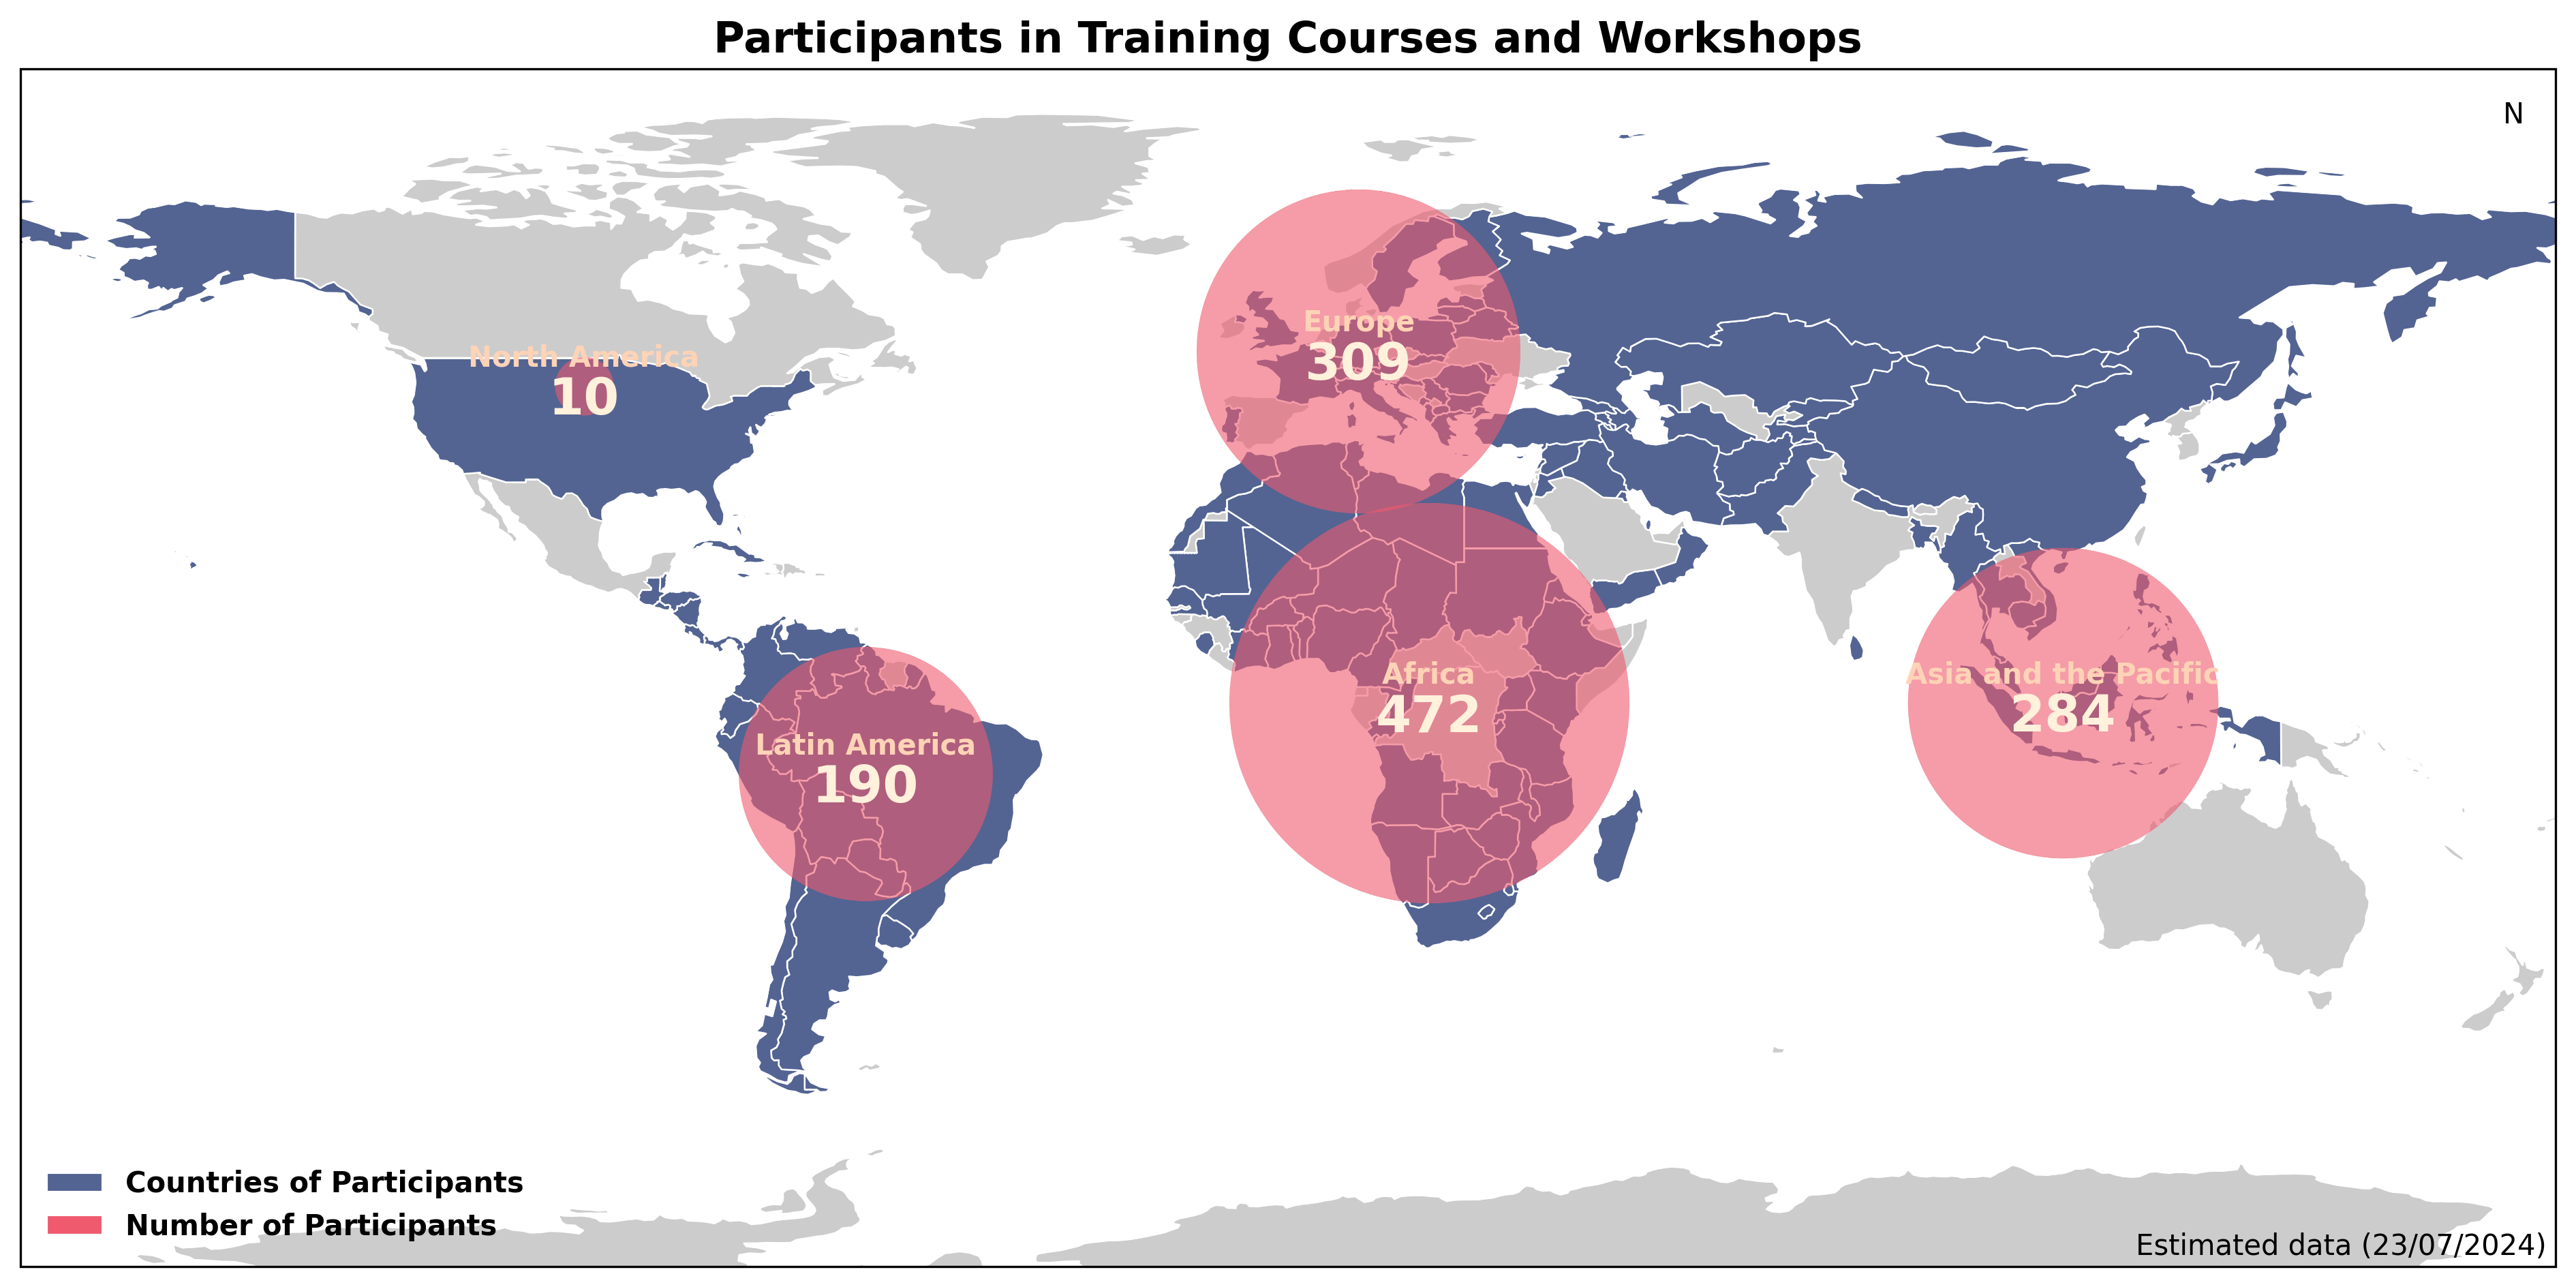

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch, Circle
from matplotlib.font_manager import FontProperties
import re
import pycountry

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 读取新的Excel文件
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# 标准化国家名称
def standardize_country_name(name):
    # 将非字符串类型转换为字符串
    name = str(name)
    # 去掉括号及其内容
    name = re.sub(r'\(.*?\)', '', name).strip()
    # 手动修正一些常见的国家名称变体
    corrections = {
        'Cote d\'Ivoire': 'Ivory Coast',
        'United States of America': 'United States',
        'Eswatini': 'Swaziland',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Russian Federation': 'Russia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Republic of Moldova': 'Moldova',
        'Congo (the Democratic Republic of the)': 'Democratic Republic of the Congo',
        'Lao People\'s Democratic Republic (the)': 'Laos',
        'Micronesia (Federated States of)': 'Micronesia',
        'Republic of Korea': 'South Korea',
        'Brunei Darussalam': 'Brunei',
        'Palestine, State of': 'Palestine',
        'Antigua and Barbuda': 'Antigua and Barbuda',
        'Bahamas (the)': 'Bahamas'
    }
    # 使用pycountry标准化名称
    try:
        standardized_name = pycountry.countries.lookup(name).name
    except LookupError:
        standardized_name = corrections.get(name, name)
    return standardized_name

df['Standardized Country Name'] = df['Country Name'].apply(standardize_country_name)

# 获取包含机构的国家列表
countries_with_institutions = df['Standardized Country Name'].unique()

# 加载国家的自然地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 在世界GeoDataFrame中创建一个新列存储颜色
world['color'] = default_country_color = '#cccccc'

# 更新包含机构的国家的颜色
world['name'] = world['name'].apply(standardize_country_name)
highlighted_country_color = '#536493'
world.loc[world['name'].isin(countries_with_institutions), 'color'] = highlighted_country_color

# 检查哪些国家没有被正确着色
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries in map data before replacements:", missing_countries)

# 手动添加缺失国家到GeoDataFrame
country_replacements = {
    'Ivory Coast': 'Côte d\'Ivoire',
    'Swaziland': 'Eswatini',
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'Bolivia': 'Bolivia, Plurinational State of',
    'Moldova': 'Moldova, Republic of',
    'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
    'Laos': 'Lao People\'s Democratic Republic',
    'Micronesia': 'Micronesia, Federated States of',
    'South Korea': 'Korea, Republic of',
    'Brunei': 'Brunei Darussalam',
    'Palestine': 'Palestine, State of',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Bahamas': 'Bahamas',
    'Bosnia': 'Bosnia and Herzegovina',
    'Comoros': 'Comoros',
    'Congo': 'Congo',
    'Saint Vincent and Grenadines': 'Saint Vincent and the Grenadines',
    'Seychelles': 'Seychelles',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Bahrain': 'Bahrain',
    'Malta': 'Malta',
    'Central African Republic': 'Central African Republic',
    'Comoros': 'Comoros',
    'Marshall Islands': 'Marshall Islands',
    'Singapore': 'Singapore',
    'Democratic Republic of Congo': 'Congo, Democratic Republic of the',
    'Russian Federation': 'Russia',
    'Mauritius': 'Mauritius',
    'Dominican Republic': 'Dominican Republic',
    'Saint Lucia': 'Saint Lucia',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Brunei Darussalam': 'Brunei'
}

for missing in missing_countries:
    replacement = country_replacements.get(missing, None)
    if replacement:
        world.loc[world['name'] == replacement, 'color'] = highlighted_country_color

# 重新检查哪些国家仍然缺失
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries after replacements:", missing_countries)

# 列出所有在数据中存在但在地图中缺失的国家
unmatched_countries = [country for country in countries_with_institutions if country not in world['name'].values]
print("Unmatched countries:", unmatched_countries)

# 计算每个区域的机构数量
region_counts = df['Iaea Region Name'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# 定义每个区域的坐标
region_coords = {
    'Africa': (20, 0),
    'Asia and the Pacific': (110, 0),
    'Europe': (10, 50),
    'Latin America': (-60, -10),
    'North America': (-100, 45)
}

# 定义气泡和文本颜色
bubble_color = '#EF5A6F'
text_color = '#FFD3B6'
text_color2 = '#FFF1DB'

# 创建一个新的投影图
fig, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# 使用指定颜色绘制国家
for _, row in world.iterrows():
    ax.add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=row['color'], edgecolor='white', linewidth=0.3)

# 绘制基础世界地图，使用白色海岸线和边界，填充陆地为浅色
ax.add_feature(cfeature.LAND, facecolor=default_country_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)

# 绘制每个区域的气泡
for (region, (x, y)) in region_coords.items():
    count = region_counts.loc[region_counts['Region'] == region, 'Count'].values[0] if region in region_counts['Region'].values else 0
    ax.scatter(x, y, s=count*42, color=bubble_color, transform=ccrs.PlateCarree(), alpha=0.6, edgecolors=bubble_color, linewidth=0.1, zorder=5)

    # 添加区域名称
    ax.text(x, y + 4, region, color=text_color, fontsize=10, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))
    # 添加数量
    ax.text(x, y - 2, f'{count}', color=text_color2, fontsize=18, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))

# 设置显示范围以聚焦北半球
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())

# 添加图例
legend_elements = [
    Patch(facecolor=highlighted_country_color, edgecolor='white', label='Countries of Participants'),
    Circle((0, 0), radius=10, facecolor=bubble_color, edgecolor='white', label='Number of Participants')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize='large', frameon=False, prop=FontProperties(weight='bold'))

# 添加专业北箭头
north_arrow = AnchoredText('N', loc='upper right', frameon=False, pad=0.6, borderpad=0.5)
ax.add_artist(north_arrow)
arrow_props = dict(facecolor='white', edgecolor='white', width=6, headwidth=12, headlength=10)
ax.annotate('', xy=(0.97, 0.97), xytext=(0.97, 0.92),
            arrowprops=arrow_props, xycoords='axes fraction', ha='center', va='center')

# 标题和标签
plt.title('Participants in Training Courses and Workshops', size=15, weight='bold')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()




In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# Count the number of male and female participants
gender_counts = df['Gender'].value_counts()

# Calculate the percentage of each gender
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Display the gender counts and percentages
print("Gender Counts:")
print(gender_counts)
print("\nGender Percentages:")
print(gender_percentage)


Gender Counts:
Gender
Female    595
Male      510
Name: count, dtype: int64

Gender Percentages:
Gender
Female    53.846154
Male      46.153846
Name: count, dtype: float64


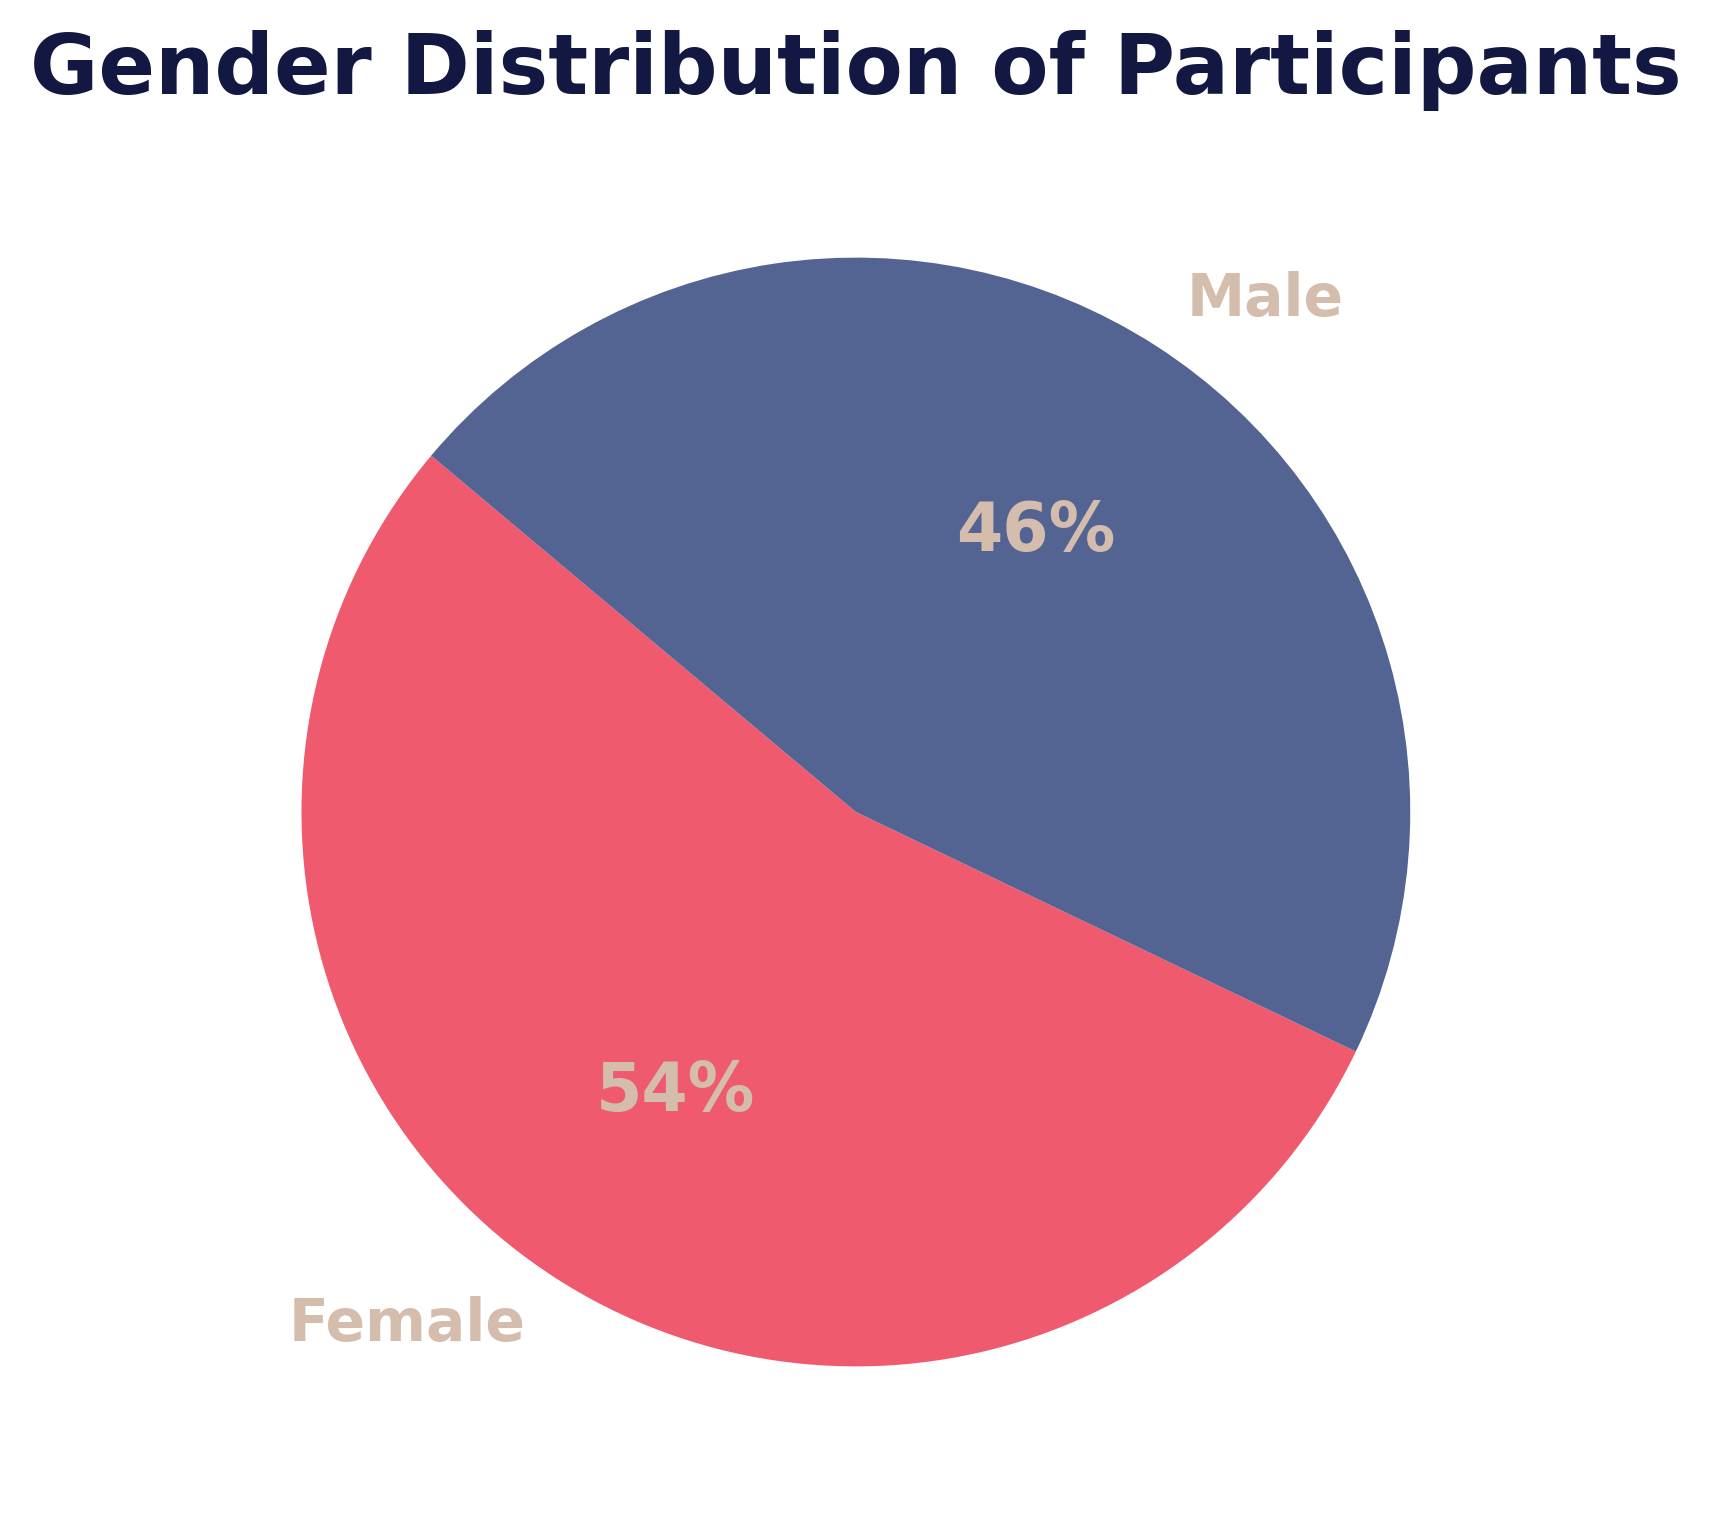

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# Count the number of male and female participants
gender_counts = df['Gender'].value_counts()

# Calculate the percentage of each gender
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Round the percentages to integers
gender_percentage = gender_percentage.round().astype(int)

# Colors for the pie chart
colors = ['#EF5A6F', '#536493']

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
wedges, texts, autotexts = ax.pie(
    gender_percentage,
    labels=gender_percentage.index,
    autopct='%1.0f%%',
    startangle=140,
    colors=colors,
    textprops={'color': '#D4BDAC', 'weight': 'bold'}
)

# Customize the font properties for the labels
for text in texts:
    text.set_fontsize(14)
    text.set_weight('bold')

for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_weight('bold')

# Add a title
plt.title('Gender Distribution of Participants', color='#131842', fontsize=20, weight='bold')

# Remove the background color
fig.patch.set_alpha(0)
ax.set_facecolor('none')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC_gender.png', dpi=300, bbox_inches='tight')


# Display the plot
plt.show()


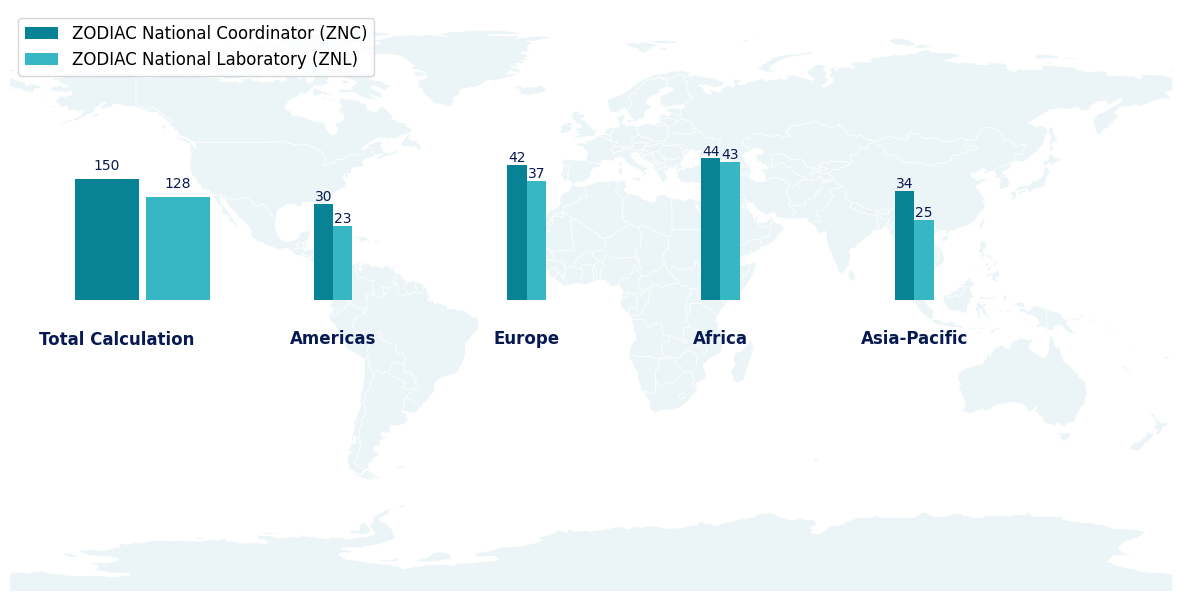

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Patch, FancyBboxPatch

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 数据
regions = ['Africa', 'Asia-Pacific', 'Europe', 'Americas']
znc_counts = [44, 34, 42, 30]
znl_counts = [43, 25, 37, 23]
total_znc = sum(znc_counts)
total_znl = sum(znl_counts)

# 颜色
znc_color = '#088395'
znl_color = '#37B7C3'
text_color = '#071952'
default_country_color = '#EBF4F6'

# 区域坐标
region_coords = {
    'Americas': (-80, 0),
    'Asia-Pacific': (100, 0),
    'Europe': (-20, 0),
    'Africa': (40, 0)  #
}

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(15, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -180, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor=default_country_color)
    ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)
    # 移除地图框
    ax.spines['geo'].set_visible(False)
    return fig, ax

# 绘制区域柱状图
def plot_regional_bars(ax, znc_counts, znl_counts):
    for region, (x, y) in region_coords.items():
        znc_count = znc_counts[regions.index(region)]
        znl_count = znl_counts[regions.index(region)]

        # 柱状图位置
        bar_width = 6
        bar_offset = 3
        ax.bar(x - bar_offset, znc_count, bar_width, color=znc_color, edgecolor='none', transform=ccrs.PlateCarree(), label='ZODIAC National Coordinator (ZNC)' if region == 'Africa' else "", zorder=3)
        ax.bar(x + bar_offset, znl_count, bar_width, color=znl_color, edgecolor='none', transform=ccrs.PlateCarree(), label='ZODIAC National Laboratory (ZNL)' if region == 'Africa' else "", zorder=3)

        # 添加数量标注
        ax.text(x - bar_offset, znc_count + y, f'{znc_count}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())
        ax.text(x + bar_offset, znl_count + y, f'{znl_count}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())

        # 区域标签
        ax.text(x, y - 12, region, color=text_color, fontsize=12, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=3)

# 绘制总柱状图
def plot_total_bars(ax):
    x_pos = -150
    bar_width = 20
    total_bar_height_factor = 0.25
    ax.bar(x_pos, total_znc * total_bar_height_factor, bar_width, color=znc_color, edgecolor='none', transform=ccrs.PlateCarree(), zorder=3)
    ax.bar(x_pos + bar_width + 2, total_znl * total_bar_height_factor, bar_width, color=znl_color, edgecolor='none', transform=ccrs.PlateCarree(), zorder=3)

    # 添加数量标注
    ax.text(x_pos, total_znc * total_bar_height_factor + 2, f'{total_znc}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())
    ax.text(x_pos + bar_width + 2, total_znl * total_bar_height_factor + 2, f'{total_znl}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())

    # 总计算标签
    ax.text(x_pos + 3, -15, 'Total Calculation', color=text_color, fontsize=12, ha='center', va='bottom', weight='bold', transform=ccrs.PlateCarree())

# 创建地图并绘制数据
fig, ax = create_base_map()
plot_regional_bars(ax, znc_counts, znl_counts)
plot_total_bars(ax)

# 图例
ax.legend(loc='upper left', fontsize=12)

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/ZNC_ZNL_ZODIAC.png', dpi=300, bbox_inches='tight')


# 显示绘图
plt.show()




In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.9 MB/s eta 0:00:00


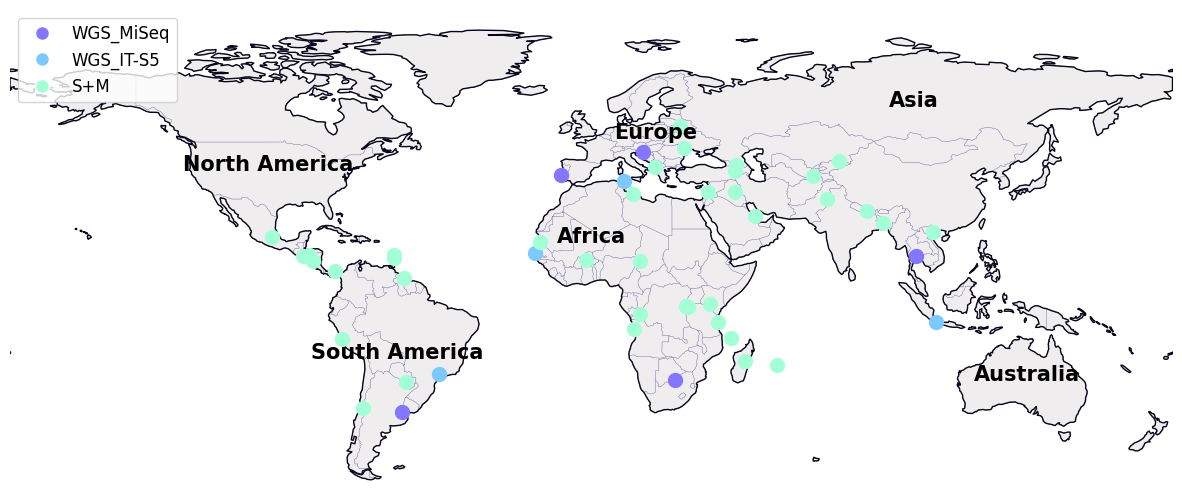

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.io.shapereader import natural_earth

# 读取数据
data = pd.read_excel('/content/drive/MyDrive/data/Zodiac_all recipients.xlsx')

# 提取数据
latitudes = data['Latitude'].tolist()
longitudes = data['Longitude'].tolist()
eq_types = data['EQ_Type'].tolist()

# 定义不同类型的颜色
type_colors = {
    'WGS_MiSeq': '#8576FF',
    'WGS_IT-S5': '#7BC9FF',  # 蓝色
    'S+M': '#A3FFD6'        # 绿色
}

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(15, 10), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())

    # 添加大洲
    ax.add_feature(cfeature.LAND, facecolor='#F0EDEE', edgecolor='black')

    # 移除地图框
    ax.spines['geo'].set_visible(False)
    fig.patch.set_alpha(0.0)  # 设置背景透明
    ax.patch.set_alpha(0.0)   # 设置背景透明
    return fig, ax

# 在地图上绘制点
def plot_country_points(ax, latitudes, longitudes, eq_types, type_colors, marker_size):
    for lat, lon, eq_type in zip(latitudes, longitudes, eq_types):
        if eq_type in type_colors:
            color = type_colors[eq_type]
            ax.plot(lon, lat, 'o', color=color, markersize=marker_size, transform=ccrs.PlateCarree(), zorder=3)

# 创建地图并绘制数据
fig, ax = create_base_map()

# 先绘制边界和海岸线
ax.add_feature(cfeature.COASTLINE, edgecolor='#1C1678', linewidth=0.2, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='#1C1678', linewidth=0.2, zorder=1)

# 然后绘制圆点
marker_size = 10  # 设定标记大小
plot_country_points(ax, latitudes, longitudes, eq_types, type_colors, marker_size)

# 标注大洲名称
continent_labels = {
    'Africa': (0, 18),
    'Asia': (100, 60),
    'Europe': (20, 50),
    'North America': (-100, 40),
    'South America': (-60, -18),
    'Australia': (135, -25)
}

for continent, (lon, lat) in continent_labels.items():
    ax.text(lon, lat, continent, horizontalalignment='center', transform=ccrs.Geodetic(), fontsize=15, fontweight='bold', color='black', zorder=4)

# 图例
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=type_colors['WGS_MiSeq'], markersize=marker_size, label='WGS_MiSeq'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=type_colors['WGS_IT-S5'], markersize=marker_size, label='WGS_IT-S5'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=type_colors['S+M'], markersize=marker_size, label='S+M')
]

# 创建图例
ax.legend(handles=handles, loc='upper left', fontsize=12, ncol=1)  # 将图例位置改为左上角

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/Zodiac_all_recipients.png', dpi=300, bbox_inches='tight', transparent=True)

# 显示绘图
plt.show()





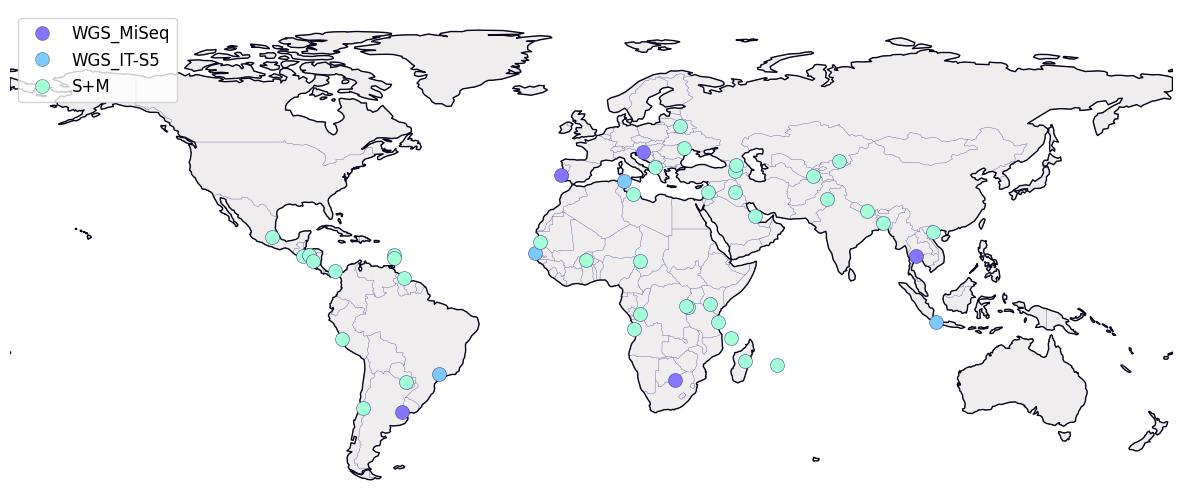

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.io.shapereader import natural_earth

# 读取数据
data = pd.read_excel('/content/drive/MyDrive/data/Zodiac_all recipients.xlsx')

# 提取数据
latitudes = data['Latitude'].tolist()
longitudes = data['Longitude'].tolist()
eq_types = data['EQ_Type'].tolist()

# 定义不同类型的颜色
type_colors = {
    'WGS_MiSeq': '#8576FF',
    'WGS_IT-S5': '#7BC9FF',  # 蓝色
    'S+M': '#A3FFD6'         # 绿色
}

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(15, 10), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())

    # 添加大洲
    ax.add_feature(cfeature.LAND, facecolor='#F0EDEE', edgecolor='black')

    # 移除地图框
    ax.spines['geo'].set_visible(False)
    fig.patch.set_alpha(0.0)  # 设置背景透明
    ax.patch.set_alpha(0.0)   # 设置背景透明
    return fig, ax

# 在地图上绘制点
def plot_country_points(ax, latitudes, longitudes, eq_types, type_colors, marker_size):
    for lat, lon, eq_type in zip(latitudes, longitudes, eq_types):
        if eq_type in type_colors:
            color = type_colors[eq_type]
            ax.plot(lon, lat, 'o', color=color, markeredgecolor='#1C1678', markeredgewidth=0.3, markersize=marker_size, transform=ccrs.PlateCarree(), zorder=3)

# 创建地图并绘制数据
fig, ax = create_base_map()

# 先绘制边界和海岸线
ax.add_feature(cfeature.COASTLINE, edgecolor='#1C1678', linewidth=0.2, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='#1C1678', linewidth=0.2, zorder=1)

# 然后绘制圆点
marker_size = 10  # 设定标记大小
plot_country_points(ax, latitudes, longitudes, eq_types, type_colors, marker_size)

# 图例
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=type_colors['WGS_MiSeq'], markeredgecolor='black', markeredgewidth=0.2, markersize=marker_size, label='WGS_MiSeq'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=type_colors['WGS_IT-S5'], markeredgecolor='black', markeredgewidth=0.2, markersize=marker_size, label='WGS_IT-S5'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=type_colors['S+M'], markeredgecolor='black', markeredgewidth=0.2, markersize=marker_size, label='S+M')
]

# 创建图例
ax.legend(handles=handles, loc='upper left', fontsize=12, ncol=1)  # 将图例位置改为左上角

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/Zodiac_all_recipients.png', dpi=300, bbox_inches='tight', transparent=True)

# 显示绘图
plt.show()


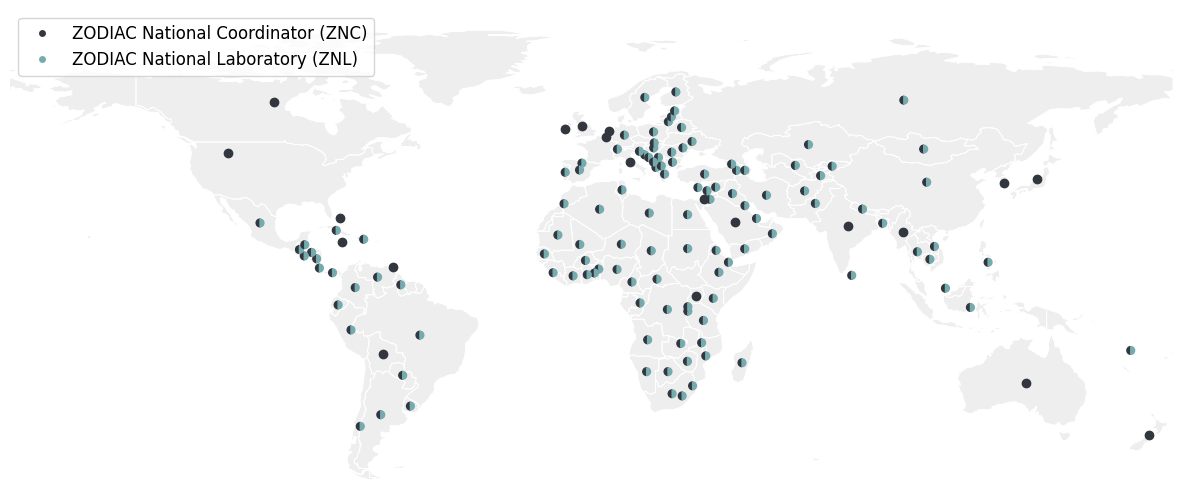

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.io.shapereader import natural_earth
from matplotlib.legend_handler import HandlerPatch
from matplotlib.patches import Wedge

# 读取数据
znc_data = pd.read_excel('/content/drive/MyDrive/data/20240722 NZC.xlsx')
znl_data = pd.read_excel('/content/drive/MyDrive/data/20240722 ZNL.xlsx')

znc_country_codes = znc_data['Iso Code 3'].tolist()
znl_country_codes = znl_data['Iso Code 3'].tolist()

# 颜色
znc_color = '#31363F'
znl_color = '#76ABAE'
text_color = '#071952'
default_country_color = '#EEEEEE'

# 点大小
marker_size = 6  # 设定标记大小

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(15, 10), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor=default_country_color)
    ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.7)
    # 移除地图框
    ax.spines['geo'].set_visible(False)
    fig.patch.set_alpha(0.0)  # 设置背景透明
    ax.patch.set_alpha(0.0)   # 设置背景透明
    return fig, ax

# 在地图上绘制点
def plot_country_points(ax, znc_country_codes, znl_country_codes, znc_color, znl_color, marker_size):
    shapefile_path = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = Reader(shapefile_path)
    for record in reader.records():
        country_code = record.attributes['ADM0_A3']
        geom = record.geometry
        x, y = geom.centroid.x, geom.centroid.y
        if country_code in znc_country_codes and country_code in znl_country_codes:
            # 绘制半橙半蓝的圆点，调整大小为 marker_size
            ax.add_patch(Wedge((x, y), marker_size / 5, 90, 270, color=znc_color, transform=ccrs.PlateCarree(), zorder=3))
            ax.add_patch(Wedge((x, y), marker_size / 5, 270, 90, color=znl_color, transform=ccrs.PlateCarree(), zorder=3))
        elif country_code in znc_country_codes:
            ax.plot(x, y, 'o', color=znc_color, markersize=marker_size, transform=ccrs.PlateCarree(), zorder=3)
        elif country_code in znl_country_codes:
            ax.plot(x, y, 'o', color=znl_color, markersize=marker_size, transform=ccrs.PlateCarree(), zorder=3)

# 创建地图并绘制数据
fig, ax = create_base_map()

# 先绘制边界和海岸线
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.7, zorder=1)

# 然后绘制圆点
plot_country_points(ax, znc_country_codes, znl_country_codes, znc_color, znl_color, marker_size)

# 图例
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=znc_color, markersize=marker_size, label='ZODIAC National Coordinator (ZNC)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=znl_color, markersize=marker_size, label='ZODIAC National Laboratory (ZNL)')
]

# 创建图例
ax.legend(handles=handles, loc='upper left', fontsize=12, ncol=1)  # 将图例位置改为左上角

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/ZNC_ZNL_ZODIAC_points.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()



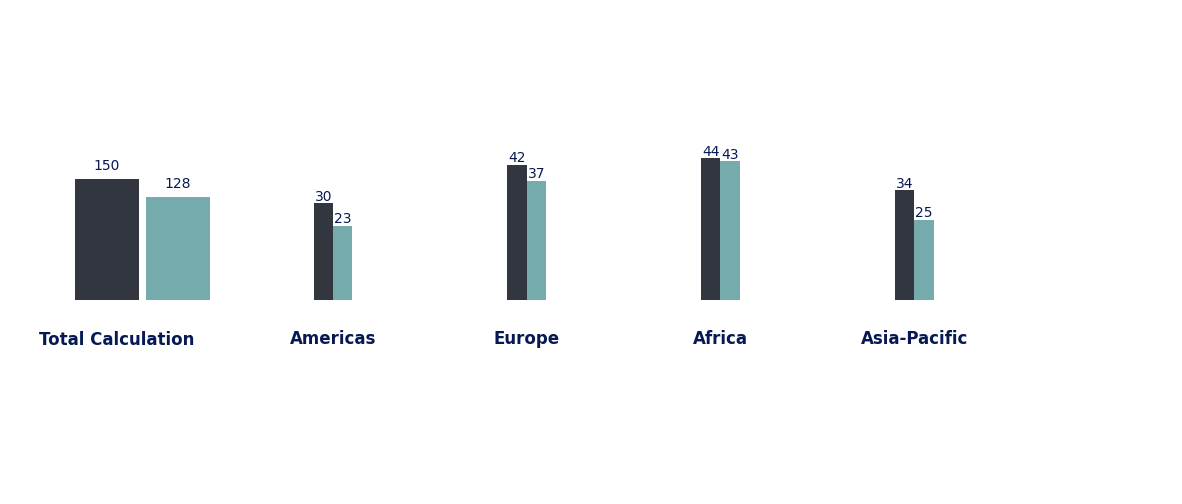

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Patch, FancyBboxPatch

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 数据
regions = ['Africa', 'Asia-Pacific', 'Europe', 'Americas']
znc_counts = [44, 34, 42, 30]
znl_counts = [43, 25, 37, 23]
total_znc = sum(znc_counts)
total_znl = sum(znl_counts)

# 颜色
znc_color = '#31363F'
znl_color = '#76ABAE'
text_color = '#071952'
default_country_color = 'white'

# 区域坐标
region_coords = {
    'Americas': (-80, 0),
    'Asia-Pacific': (100, 0),
    'Europe': (-20, 0),
    'Africa': (40, 0)  #
}

# 绘制区域柱状图
def plot_regional_bars(ax, znc_counts, znl_counts):
    for region, (x, y) in region_coords.items():
        znc_count = znc_counts[regions.index(region)]
        znl_count = znl_counts[regions.index(region)]

        # 柱状图位置
        bar_width = 6
        bar_offset = 3
        ax.bar(x - bar_offset, znc_count, bar_width, color=znc_color, edgecolor='none', transform=ccrs.PlateCarree(), label='ZODIAC National Coordinator (ZNC)' if region == 'Africa' else "", zorder=3)
        ax.bar(x + bar_offset, znl_count, bar_width, color=znl_color, edgecolor='none', transform=ccrs.PlateCarree(), label='ZODIAC National Laboratory (ZNL)' if region == 'Africa' else "", zorder=3)

        # 添加数量标注
        ax.text(x - bar_offset, znc_count + y, f'{znc_count}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())
        ax.text(x + bar_offset, znl_count + y, f'{znl_count}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())

        # 区域标签
        ax.text(x, y - 12, region, color=text_color, fontsize=12, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=3)

# 绘制总柱状图
def plot_total_bars(ax):
    x_pos = -150
    bar_width = 20
    total_bar_height_factor = 0.25
    ax.bar(x_pos, total_znc * total_bar_height_factor, bar_width, color=znc_color, edgecolor='none', transform=ccrs.PlateCarree(), zorder=3)
    ax.bar(x_pos + bar_width + 2, total_znl * total_bar_height_factor, bar_width, color=znl_color, edgecolor='none', transform=ccrs.PlateCarree(), zorder=3)

    # 添加数量标注
    ax.text(x_pos, total_znc * total_bar_height_factor + 2, f'{total_znc}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())
    ax.text(x_pos + bar_width + 2, total_znl * total_bar_height_factor + 2, f'{total_znl}', color=text_color, fontsize=10, ha='center', va='bottom', transform=ccrs.PlateCarree())

    # 总计算标签
    ax.text(x_pos + 3, -15, 'Total Calculation', color=text_color, fontsize=12, ha='center', va='bottom', weight='bold', transform=ccrs.PlateCarree())

# 创建地图并绘制数据
fig, ax = create_base_map()
plot_regional_bars(ax, znc_counts, znl_counts)
plot_total_bars(ax)

# 图例
#ax.legend(loc='upper left', fontsize=12)

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/ZNC_ZNL_ZODIAC_bars.png', dpi=300, bbox_inches='tight')


# 显示绘图
plt.show()

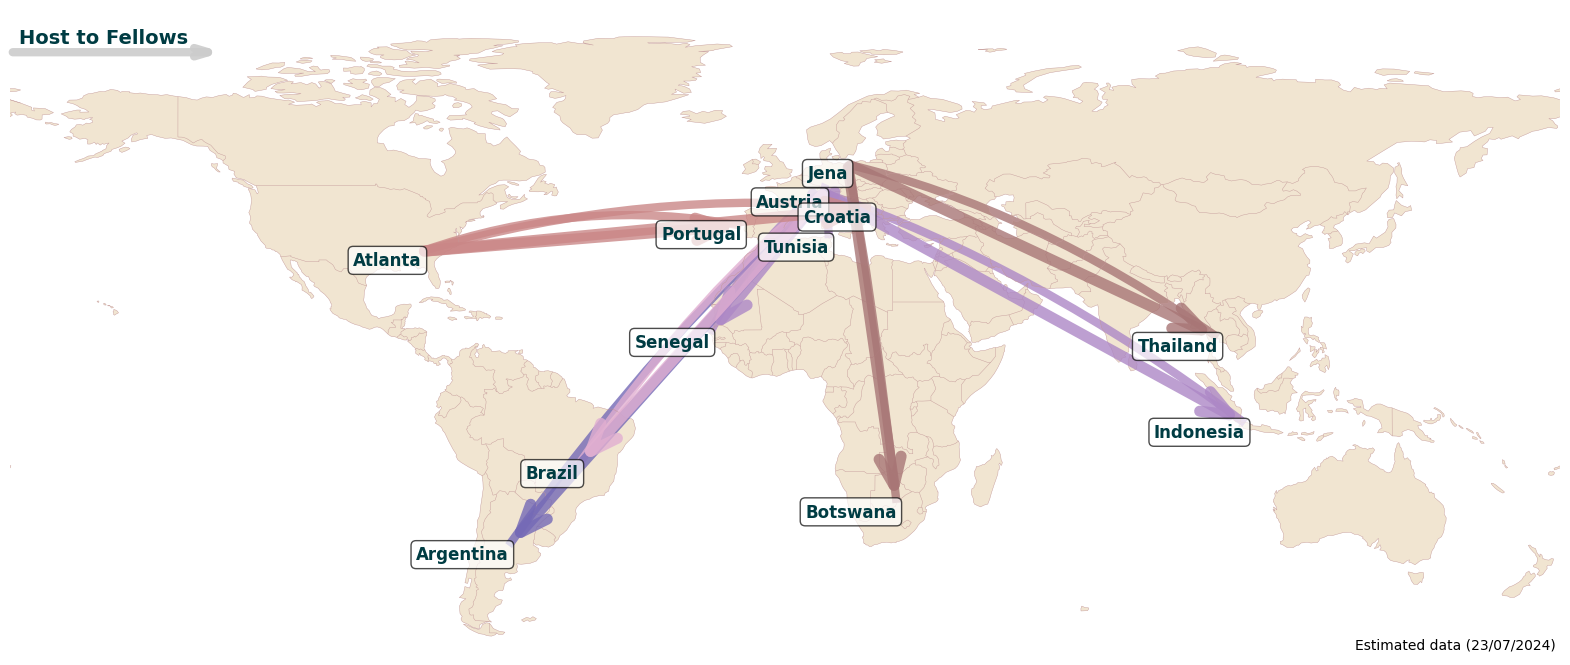

In [ ]:

import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.patches import FancyArrowPatch, PathPatch
from matplotlib.path import Path

# 数据
locations = {
    'Austria': {'coords': (9, 47.3333)},  # 向左移
    'Argentina': {'coords': (-64.1833, -34.6)},
    'Indonesia': {'coords': (106.8283, -6.1808)},
    'Senegal': {'coords': (-17.4737, 14.6928)},
    'Tunisia': {'coords': (10.1658, 36.8188)},
    'Brazil': {'coords': (-47.9292, -15.7801)},
    'Atlanta': {'coords': (-84.3880, 33.7490)},
    'Croatia': {'coords': (19.9614, 43.8150)},  # 向右移
    'Portugal': {'coords': (-10.1393, 39.7223)},
    'Jena': {'coords': (14.5899, 53.9271)},  # 向右移
    'Botswana': {'coords': (25.9200, -24.6583)},
    'Thailand': {'coords': (100.5018, 13.7563)}
}

# 分组和颜色设置
groups = {
    1: [('Austria', 'Argentina')],
    2: [('Austria', 'Indonesia'), ('Austria', 'Senegal'), ('Austria', 'Tunisia')],
    3: [('Austria', 'Brazil')],
    4: [('Atlanta', 'Croatia'), ('Atlanta', 'Portugal')],
    5: [('Jena', 'Botswana'), ('Jena', 'Thailand')]
}

colors = {
    1: '#7469B6',
    2: '#AD88C6',
    3: '#E1AFD1',
    4: '#CA8787',
    5: '#A87676'
}

# 配色方案
map_color = '#F1E5D1'
border_color = '#C39898'
text_color = '#003C43'

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(20, 10), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor=map_color)
    ax.add_feature(cfeature.COASTLINE, edgecolor=border_color, linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, edgecolor=border_color, linewidth=0.3)
    # 移除地图框
    ax.spines['geo'].set_visible(False)
    fig.patch.set_alpha(0.0)  # 设置背景透明
    ax.patch.set_alpha(0.0)   # 设置背景透明
    return fig, ax

# 绘制位置和箭头
def plot_locations_and_arrows(ax, locations, groups, colors):
    for group, relations in groups.items():
        color = colors[group]
        for start, end in relations:
            start_coords = locations[start]['coords']
            end_coords = locations[end]['coords']

            # 计算箭头路径
            lon_start, lat_start = start_coords
            lon_end, lat_end = end_coords
            lon_center = (lon_start + lon_end) / 2
            lat_center = (lat_start + lat_end) / 2 + 10  # 调整弧度

            # 贝塞尔曲线控制点
            control_point = (lon_center, lat_center)

            # 创建贝塞尔曲线路径
            vertices = np.array([start_coords, control_point, end_coords])
            codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
            path = Path(vertices, codes)
            patch = PathPatch(path, facecolor='none', edgecolor=color, lw=6, alpha=0.8)
            ax.add_patch(patch)

            # 绘制箭头
            ax.annotate('', xy=end_coords, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                        xytext=start_coords, textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                        arrowprops=dict(arrowstyle="->,head_width=0.8,head_length=2", color=color, alpha=0.8, lw=8),
                        zorder=5)

    # 绘制位置标签
    for loc, data in locations.items():
        ax.text(data['coords'][0], data['coords'][1], loc,
                transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
                ha='right', va='top', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'), zorder=6)

# 添加图例箭头
def plot_legend_arrow(ax):
    ax.annotate('', xy=(-130, 80), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                xytext=(-180, 80), textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                arrowprops=dict(arrowstyle="->,head_width=0.3,head_length=1", color='#cccccc', alpha=0.9, lw=6),
                zorder=5)
    ax.text(-178, 82, 'Host to Fellows', transform=ccrs.PlateCarree(), fontsize=14, color=text_color, fontweight='bold', bbox=dict(facecolor='none', alpha=0))


# 创建地图并绘制数据
fig, ax = create_base_map()
plot_locations_and_arrows(ax, locations, groups, colors)
plot_legend_arrow(ax)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/Fellowship_ZODIAC.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()



In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.5 MB/s eta 0:00:00


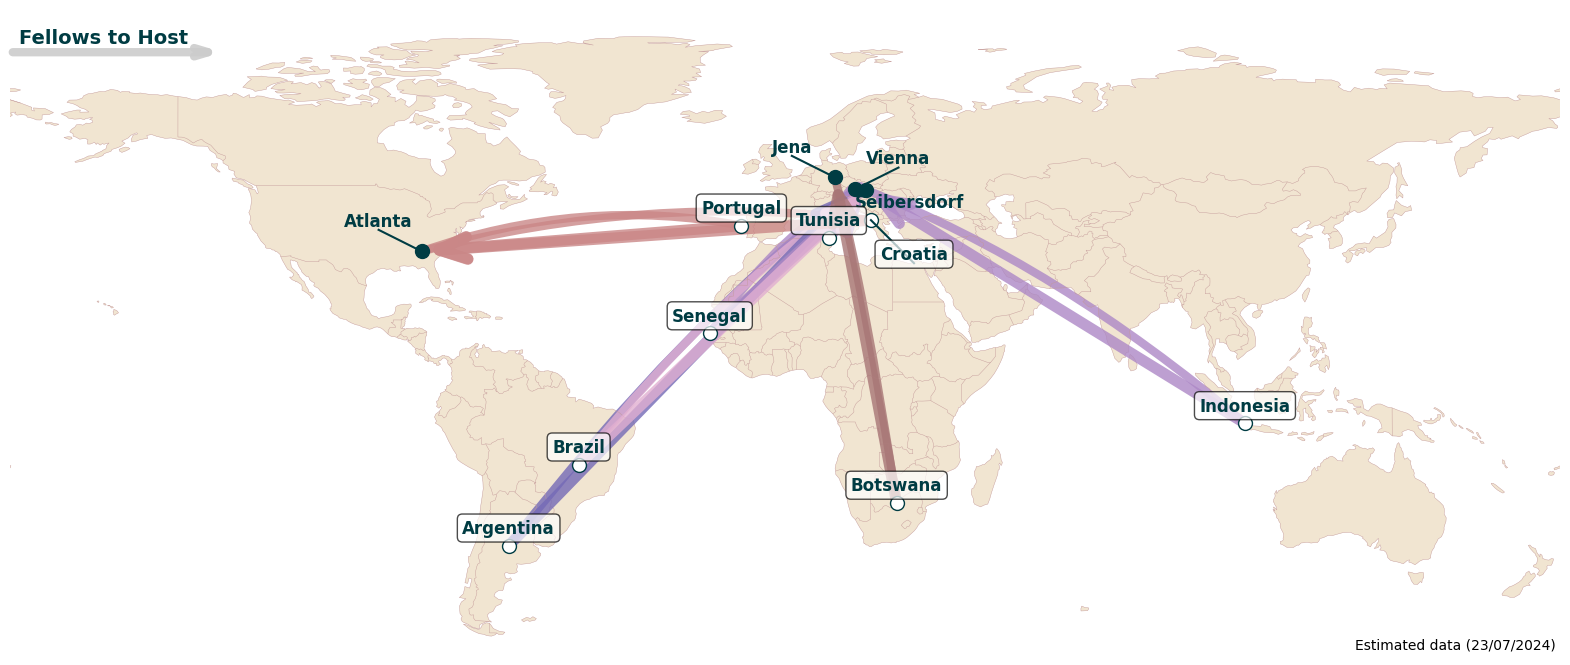

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# 数据
locations = {
    'Vienna': {'coords': (16.363449, 48.210033)},
    'Seibersdorf': {'coords': (18.916667, 47.978056)},
    'Argentina': {'coords': (-64.1833, -34.6)},
    'Indonesia': {'coords': (106.8283, -6.1808)},
    'Senegal': {'coords': (-17.4737, 14.6928)},
    'Tunisia': {'coords': (10.1658, 36.8188)},
    'Brazil': {'coords': (-47.9292, -15.7801)},
    'Atlanta': {'coords': (-84.3880, 33.7490)},
    'Croatia': {'coords': (19.9614, 41.0)},  # 向下移
    'Portugal': {'coords': (-10.1393, 39.7223)},
    'Jena': {'coords': (11.5899, 50.9271)},
    'Botswana': {'coords': (25.9200, -24.6583)}
}

# 分组和颜色设置
groups = {
    1: [('Argentina', 'Vienna')],
    2: [('Indonesia', 'Seibersdorf'), ('Senegal', 'Seibersdorf'), ('Tunisia', 'Seibersdorf')],
    3: [('Brazil', 'Seibersdorf')],
    4: [('Croatia', 'Atlanta'), ('Portugal', 'Atlanta')],
    5: [('Botswana', 'Jena')]
}

colors = {
    1: '#7469B6',
    2: '#AD88C6',
    3: '#E1AFD1',
    4: '#CA8787',
    5: '#A87676'
}

# 配色方案
map_color = '#F1E5D1'
border_color = '#C39898'
text_color = '#003C43'

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(20, 10), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor=map_color)
    ax.add_feature(cfeature.COASTLINE, edgecolor=border_color, linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, edgecolor=border_color, linewidth=0.3)
    # 移除地图框
    ax.spines['geo'].set_visible(False)
    fig.patch.set_alpha(0.0)  # 设置背景透明
    ax.patch.set_alpha(0.0)   # 设置背景透明
    return fig, ax

# 绘制位置和箭头
def plot_locations_and_arrows(ax, locations, groups, colors):
    host_cities = ['Vienna', 'Seibersdorf', 'Atlanta', 'Jena']
    host_labels_offset = {
        'Atlanta': (-10, 5),
        'Jena': (-10, 5),
        'Seibersdorf': (10, -5),
        'Vienna': (10, 5)
    }

    fellow_labels_offset = {
        'Croatia': (10, -10)  # 向下移
    }

    for group, relations in groups.items():
        color = colors[group]
        for start, end in relations:
            start_coords = locations[start]['coords']
            end_coords = locations[end]['coords']

            # 计算箭头路径
            lon_start, lat_start = start_coords
            lon_end, lat_end = end_coords
            lon_center = (lon_start + lon_end) / 2
            lat_center = (lat_start + lat_end) / 2 + 10  # 调整弧度

            # 贝塞尔曲线控制点
            control_point = (lon_center, lat_center)

            # 创建贝塞尔曲线路径
            vertices = np.array([start_coords, control_point, end_coords])
            codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
            path = Path(vertices, codes)
            patch = PathPatch(path, facecolor='none', edgecolor=color, lw=6, alpha=0.8)
            ax.add_patch(patch)

            # 绘制箭头
            ax.annotate('', xy=end_coords, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                        xytext=start_coords, textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                        arrowprops=dict(arrowstyle="->,head_width=0.8,head_length=2", color=color, alpha=0.8, lw=8),
                        zorder=5)

# 绘制host城市的圆点和外部标注
    for loc in host_cities:
        data = locations[loc]
        offset = host_labels_offset[loc]
        # 绘制圆点
        ax.plot(data['coords'][0], data['coords'][1], 'o', color=text_color, markersize=10, transform=ccrs.PlateCarree(), zorder=6)
        # 对于Seibersdorf，不绘制连接线
        if loc != 'Seibersdorf':
            # 绘制连接线
            ax.plot([data['coords'][0], data['coords'][0] + offset[0]], [data['coords'][1], data['coords'][1] + offset[1]],
                    color=text_color, transform=ccrs.PlateCarree(), zorder=6)
        # 绘制标注
        ax.text(data['coords'][0] + offset[0], data['coords'][1] + offset[1], loc,
                transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
                ha='center', va='bottom', zorder=7)


    # 绘制fellow城市的圆点和标签
    for loc, data in locations.items():
        if loc not in host_cities and loc != 'Croatia':
            ax.plot(data['coords'][0], data['coords'][1], 'o', color='white', markersize=10, transform=ccrs.PlateCarree(), zorder=6, markeredgecolor=text_color)
            ax.text(data['coords'][0], data['coords'][1] + 2, loc,
                    transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
                    ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'), zorder=7)

    # Croatia 特殊处理
    loc = 'Croatia'
    data = locations[loc]
    offset = fellow_labels_offset[loc]
    ax.plot(data['coords'][0], data['coords'][1], 'o', color='white', markersize=10, transform=ccrs.PlateCarree(), zorder=6, markeredgecolor=text_color)
    ax.plot([data['coords'][0], data['coords'][0] + offset[0]], [data['coords'][1], data['coords'][1] + offset[1]],
            color=text_color, transform=ccrs.PlateCarree(), zorder=6)
    ax.text(data['coords'][0] + offset[0], data['coords'][1] + offset[1], loc,
            transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
            ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'), zorder=7)

# 添加图例箭头
def plot_legend_arrow(ax):
    ax.annotate('', xy=(-130, 80), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                xytext=(-180, 80), textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                arrowprops=dict(arrowstyle="->,head_width=0.3,head_length=1", color='#cccccc', alpha=0.9, lw=6),
                zorder=5)
    ax.text(-178, 82, 'Fellows to Host', transform=ccrs.PlateCarree(), fontsize=14, color=text_color, fontweight='bold', bbox=dict(facecolor='none', alpha=0))


# 创建地图并绘制数据
fig, ax = create_base_map()
plot_locations_and_arrows(ax, locations, groups, colors)
plot_legend_arrow(ax)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/Fellowship_ZODIAC(6).png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()







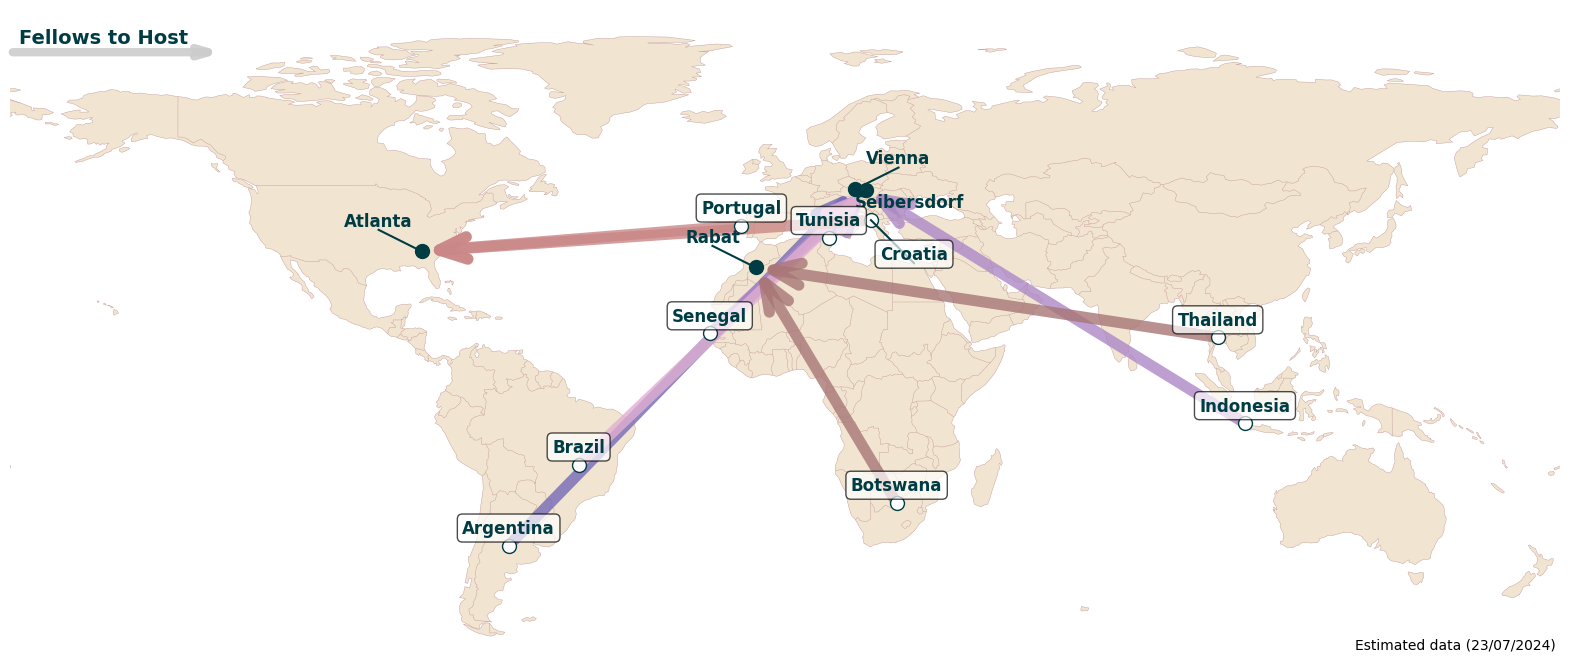

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# 数据
locations = {
    'Vienna': {'coords': (16.363449, 48.210033)},
    'Seibersdorf': {'coords': (18.916667, 47.978056)},
    'Argentina': {'coords': (-64.1833, -34.6)},
    'Indonesia': {'coords': (106.8283, -6.1808)},
    'Senegal': {'coords': (-17.4737, 14.6928)},
    'Tunisia': {'coords': (10.1658, 36.8188)},
    'Brazil': {'coords': (-47.9292, -15.7801)},
    'Atlanta': {'coords': (-84.3880, 33.7490)},
    'Croatia': {'coords': (19.9614, 41.0)},  # 向下移
    'Portugal': {'coords': (-10.1393, 39.7223)},
    'Rabat': {'coords': (-6.8498, 30.0209)},  # 改成 Rabat 的坐标
    'Botswana': {'coords': (25.9200, -24.6583)},
    'Thailand': {'coords': (100.5018, 13.7563)}  # 新增泰国
}

# 分组和颜色设置
groups = {
    1: [('Argentina', 'Vienna')],
    2: [('Indonesia', 'Seibersdorf'), ('Senegal', 'Seibersdorf'), ('Tunisia', 'Seibersdorf')],
    3: [('Brazil', 'Seibersdorf')],
    4: [('Croatia', 'Atlanta'), ('Portugal', 'Atlanta')],
    5: [('Botswana', 'Rabat'), ('Thailand', 'Rabat')]  # 增加从泰国到拉巴特
}

colors = {
    1: '#7469B6',
    2: '#AD88C6',
    3: '#E1AFD1',
    4: '#CA8787',
    5: '#A87676'
}

# 配色方案
map_color = '#F1E5D1'
border_color = '#C39898'
text_color = '#003C43'

# 创建基础世界地图
def create_base_map():
    fig, ax = plt.subplots(figsize=(20, 10), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor=map_color)
    ax.add_feature(cfeature.COASTLINE, edgecolor=border_color, linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, edgecolor=border_color, linewidth=0.3)
    # 移除地图框
    ax.spines['geo'].set_visible(False)
    fig.patch.set_alpha(0.0)  # 设置背景透明
    ax.patch.set_alpha(0.0)   # 设置背景透明
    return fig, ax

# 绘制位置和箭头
def plot_locations_and_arrows(ax, locations, groups, colors):
    host_cities = ['Vienna', 'Seibersdorf', 'Atlanta', 'Rabat']
    host_labels_offset = {
        'Atlanta': (-10, 5),
        'Rabat': (-10, 5),
        'Seibersdorf': (10, -5),
        'Vienna': (10, 5)
    }

    fellow_labels_offset = {
        'Croatia': (10, -10)  # 向下移
    }

    for group, relations in groups.items():
        color = colors[group]
        for start, end in relations:
            start_coords = locations[start]['coords']
            end_coords = locations[end]['coords']



            # 绘制箭头
            ax.annotate('', xy=end_coords, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                        xytext=start_coords, textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                        arrowprops=dict(arrowstyle="->,head_width=0.8,head_length=2", color=color, alpha=0.8, lw=8),
                        zorder=5)

# 绘制host城市的圆点和外部标注
    for loc in host_cities:
        data = locations[loc]
        offset = host_labels_offset[loc]
        # 绘制圆点
        ax.plot(data['coords'][0], data['coords'][1], 'o', color=text_color, markersize=10, transform=ccrs.PlateCarree(), zorder=6)
        # 对于Seibersdorf，不绘制连接线
        if loc != 'Seibersdorf':
            # 绘制连接线
            ax.plot([data['coords'][0], data['coords'][0] + offset[0]], [data['coords'][1], data['coords'][1] + offset[1]],
                    color=text_color, transform=ccrs.PlateCarree(), zorder=6)
        # 绘制标注
        ax.text(data['coords'][0] + offset[0], data['coords'][1] + offset[1], loc,
                transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
                ha='center', va='bottom', zorder=7)


    # 绘制fellow城市的圆点和标签
    for loc, data in locations.items():
        if loc not in host_cities and loc != 'Croatia':
            ax.plot(data['coords'][0], data['coords'][1], 'o', color='white', markersize=10, transform=ccrs.PlateCarree(), zorder=6, markeredgecolor=text_color)
            ax.text(data['coords'][0], data['coords'][1] + 2, loc,
                    transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
                    ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'), zorder=7)

    # Croatia 特殊处理
    loc = 'Croatia'
    data = locations[loc]
    offset = fellow_labels_offset[loc]
    ax.plot(data['coords'][0], data['coords'][1], 'o', color='white', markersize=10, transform=ccrs.PlateCarree(), zorder=6, markeredgecolor=text_color)
    ax.plot([data['coords'][0], data['coords'][0] + offset[0]], [data['coords'][1], data['coords'][1] + offset[1]],
            color=text_color, transform=ccrs.PlateCarree(), zorder=6)
    ax.text(data['coords'][0] + offset[0], data['coords'][1] + offset[1], loc,
            transform=ccrs.PlateCarree(), fontsize=12, color=text_color, fontweight='bold',
            ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'), zorder=7)

# 添加图例箭头
def plot_legend_arrow(ax):
    ax.annotate('', xy=(-130, 80), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                xytext=(-180, 80), textcoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                arrowprops=dict(arrowstyle="->,head_width=0.3,head_length=1", color='#cccccc', alpha=0.9, lw=6),
                zorder=5)
    ax.text(-178, 82, 'Fellows to Host', transform=ccrs.PlateCarree(), fontsize=14, color=text_color, fontweight='bold', bbox=dict(facecolor='none', alpha=0))


# 创建地图并绘制数据
fig, ax = create_base_map()
plot_locations_and_arrows(ax, locations, groups, colors)
plot_legend_arrow(ax)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/Fellowship_ZODIAC(6).png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()



<ipython-input-118-029b257f4f66>:64: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Missing countries in map data before replacements: {'Brunei Darussalam', 'Russian Federation', 'Bosnia and Herzegovina', 'nan', 'Bahrain', 'Seychelles', 'Congo, Democratic Republic of the', 'Mauritius', 'Central African Republic', 'Saint Vincent and the Grenadines', 'Malta', 'Singapore', 'Saint Lucia', 'Comoros', 'Antigua and Barbuda', 'Ivory Coast', 'Dominican Republic', 'Marshall Islands'}
Missing countries after replacements: {'Brunei Darussalam', 'Russian Federation', 'Bosnia and Herzegovina', 'nan', 'Bahrain', 'Seychelles', 'Congo, Democratic Republic of the', 'Mauritius', 'Central African Republic', 'Saint Vincent and the Grenadines', 'Malta', 'Singapore', 'Saint Lucia', 'Comoros', 'Antigua and Barbuda', 'Ivory Coast', 'Dominican Republic', 'Marshall Islands'}
Unmatched countries: ['nan', 'Ivory Coast', 'Saint Vincent and the Grenadines', 'Seychelles', 'Bosnia and Herzegovina', 'Bahrain', 'Malta', 'Central African Republic', 'Comoros', 'Marshall Islands', 'Singapore', 'Congo, Dem

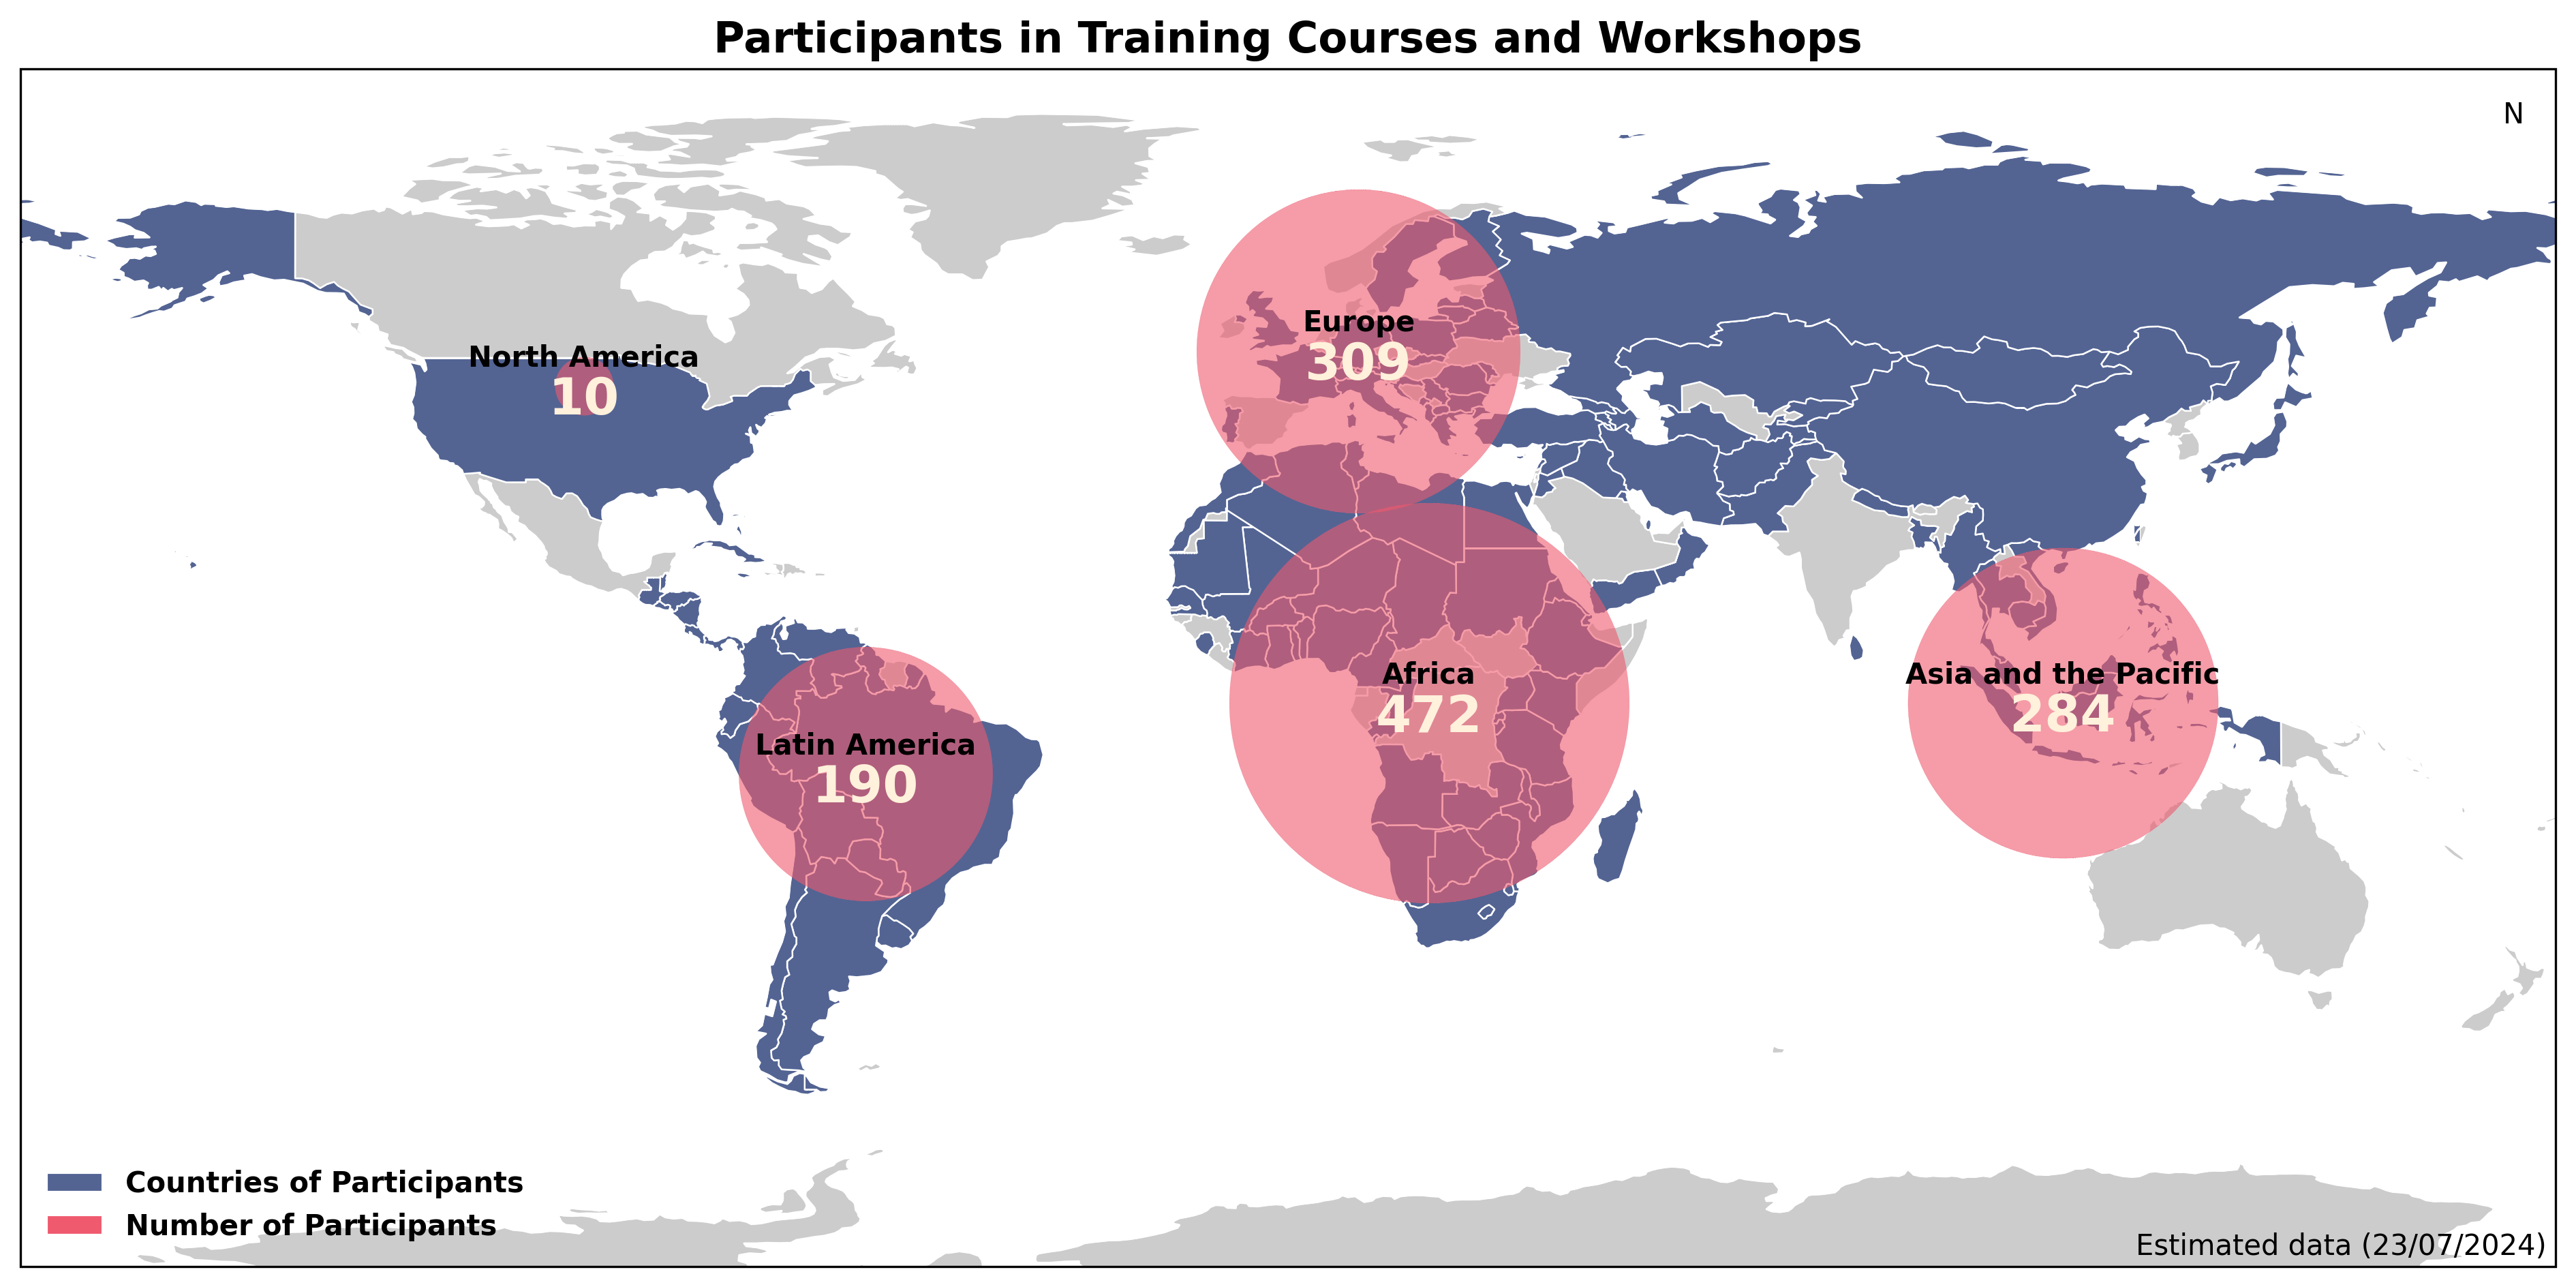

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch, Circle
from matplotlib.font_manager import FontProperties
import re
import pycountry
from shapely.geometry import Polygon

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 读取新的Excel文件
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# 标准化国家名称
def standardize_country_name(name):
    # 将非字符串类型转换为字符串
    name = str(name)
    # 去掉括号及其内容
    name = re.sub(r'\(.*?\)', '', name).strip()
    # 手动修正一些常见的国家名称变体
    corrections = {
        'Cote d\'Ivoire': 'Ivory Coast',
        'United States of America': 'United States',
        'Eswatini': 'Swaziland',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Russian Federation': 'Russia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Republic of Moldova': 'Moldova',
        'Congo (the Democratic Republic of the)': 'Democratic Republic of the Congo',
        'Lao People\'s Democratic Republic (the)': 'Laos',
        'Micronesia (Federated States of)': 'Micronesia',
        'Republic of Korea': 'South Korea',
        'Brunei Darussalam': 'Brunei',
        'Palestine, State of': 'Palestine',
        'Antigua and Barbuda': 'Antigua and Barbuda',
        'Bahamas (the)': 'Bahamas',
        'Saint Vincent and Grenadines': 'Saint Vincent and the Grenadines',
        'Central African Republic (the)': 'Central African Republic',
        'Democratic Republic of Congo': 'Congo, Democratic Republic of the'
    }
    # 使用pycountry标准化名称
    try:
        standardized_name = pycountry.countries.lookup(name).name
    except LookupError:
        standardized_name = corrections.get(name, name)
    return standardized_name

df['Standardized Country Name'] = df['Country Name'].apply(standardize_country_name)

# 获取包含机构的国家列表
countries_with_institutions = df['Standardized Country Name'].unique()

# 加载国家的自然地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 在世界GeoDataFrame中创建一个新列存储颜色
world['color'] = default_country_color = '#cccccc'

# 更新包含机构的国家的颜色
world['name'] = world['name'].apply(standardize_country_name)
highlighted_country_color = '#536493'
world.loc[world['name'].isin(countries_with_institutions), 'color'] = highlighted_country_color

# 检查哪些国家没有被正确着色
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries in map data before replacements:", missing_countries)

# 手动添加缺失国家到GeoDataFrame
country_replacements = {
    'Ivory Coast': 'Côte d\'Ivoire',
    'Swaziland': 'Eswatini',
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'Bolivia': 'Bolivia, Plurinational State of',
    'Moldova': 'Moldova, Republic of',
    'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
    'Laos': 'Lao People\'s Democratic Republic',
    'Micronesia': 'Micronesia, Federated States of',
    'South Korea': 'Korea, Republic of',
    'Brunei': 'Brunei Darussalam',
    'Palestine': 'Palestine, State of',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Bahamas': 'Bahamas',
    'Bosnia': 'Bosnia and Herzegovina',
    'Comoros': 'Comoros',
    'Congo': 'Congo',
    'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Seychelles': 'Seychelles',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Bahrain': 'Bahrain',
    'Malta': 'Malta',
    'Central African Republic': 'Central African Republic',
    'Marshall Islands': 'Marshall Islands',
    'Singapore': 'Singapore',
    'Russian Federation': 'Russia',
    'Mauritius': 'Mauritius',
    'Dominican Republic': 'Dominican Republic',
    'Saint Lucia': 'Saint Lucia',
    'Taiwan': 'Taiwan'
}

# 更新world GeoDataFrame中的国家颜色
for missing in missing_countries:
    replacement = country_replacements.get(missing, None)
    if replacement:
        world.loc[world['name'] == replacement, 'color'] = highlighted_country_color

# 重新检查哪些国家仍然缺失
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries after replacements:", missing_countries)

# 列出所有在数据中存在但在地图中缺失的国家
unmatched_countries = [country for country in countries_with_institutions if country not in world['name'].values]
print("Unmatched countries:", unmatched_countries)

# 手动添加台湾的几何信息
taiwan_geometry = Polygon([(120.1, 22.9), (121.0, 22.9), (121.0, 25.3), (120.1, 25.3), (120.1, 22.9)])
taiwan = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[taiwan_geometry])
taiwan['color'] = highlighted_country_color

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# 使用指定颜色绘制国家
for _, row in world.iterrows():
    ax.add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=row['color'], edgecolor='white', linewidth=0.3)

# 手动绘制台湾
ax.add_geometries(taiwan['geometry'], ccrs.PlateCarree(), facecolor=highlighted_country_color, edgecolor='white', linewidth=0.3)

# 绘制基础世界地图，使用白色海岸线和边界，填充陆地为浅色
ax.add_feature(cfeature.LAND, facecolor=default_country_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)

# 绘制每个区域的气泡
region_counts = df['Iaea Region Name'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
region_coords = {
    'Africa': (20, 0),
    'Asia and the Pacific': (110, 0),
    'Europe': (10, 50),
    'Latin America': (-60, -10),
    'North America': (-100, 45)
}
bubble_color = '#EF5A6F'
text_color = 'black'
text_color2 = '#FFF1DB'
for (region, (x, y)) in region_coords.items():
    count = region_counts.loc[region_counts['Region'] == region, 'Count'].values[0] if region in region_counts['Region'].values else 0
    ax.scatter(x, y, s=count*42, color=bubble_color, transform=ccrs.PlateCarree(), alpha=0.6, edgecolors=bubble_color, linewidth=0.1, zorder=5)
    ax.text(x, y + 4, region, color=text_color, fontsize=10, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))
    ax.text(x, y - 2, f'{count}', color=text_color2, fontsize=18, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))

# 设置显示范围以聚焦北半球
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())

# 添加图例
legend_elements = [
    Patch(facecolor=highlighted_country_color, edgecolor='white', label='Countries of Participants'),
    Circle((0, 0), radius=10, facecolor=bubble_color, edgecolor='white', label='Number of Participants')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize='large', frameon=False, prop=FontProperties(weight='bold'))

# 添加专业北箭头
north_arrow = AnchoredText('N', loc='upper right', frameon=False, pad=0.6, borderpad=0.5)
ax.add_artist(north_arrow)
arrow_props = dict(facecolor='white', edgecolor='white', width=6, headwidth=12, headlength=10)
ax.annotate('', xy=(0.97, 0.97), xytext=(0.97, 0.92),
            arrowprops=arrow_props, xycoords='axes fraction', ha='center', va='center')

# 标题和标签
plt.title('Participants in Training Courses and Workshops', size=15, weight='bold')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC(4).png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()




<ipython-input-102-4dbea66fcfc7>:63: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Missing countries in map data before replacements: {'Brunei Darussalam', 'Russian Federation', 'Bosnia and Herzegovina', 'nan', 'Bahrain', 'Seychelles', 'Congo, Democratic Republic of the', 'Mauritius', 'Central African Republic', 'Saint Vincent and the Grenadines', 'Malta', 'Singapore', 'Saint Lucia', 'Comoros', 'Antigua and Barbuda', 'Ivory Coast', 'Dominican Republic', 'Marshall Islands'}
Missing countries after replacements: {'Brunei Darussalam', 'Russian Federation', 'Bosnia and Herzegovina', 'nan', 'Bahrain', 'Seychelles', 'Congo, Democratic Republic of the', 'Mauritius', 'Central African Republic', 'Saint Vincent and the Grenadines', 'Malta', 'Singapore', 'Saint Lucia', 'Comoros', 'Antigua and Barbuda', 'Ivory Coast', 'Dominican Republic', 'Marshall Islands'}
Unmatched countries: ['nan', 'Ivory Coast', 'Saint Vincent and the Grenadines', 'Seychelles', 'Bosnia and Herzegovina', 'Bahrain', 'Malta', 'Central African Republic', 'Comoros', 'Marshall Islands', 'Singapore', 'Congo, Dem

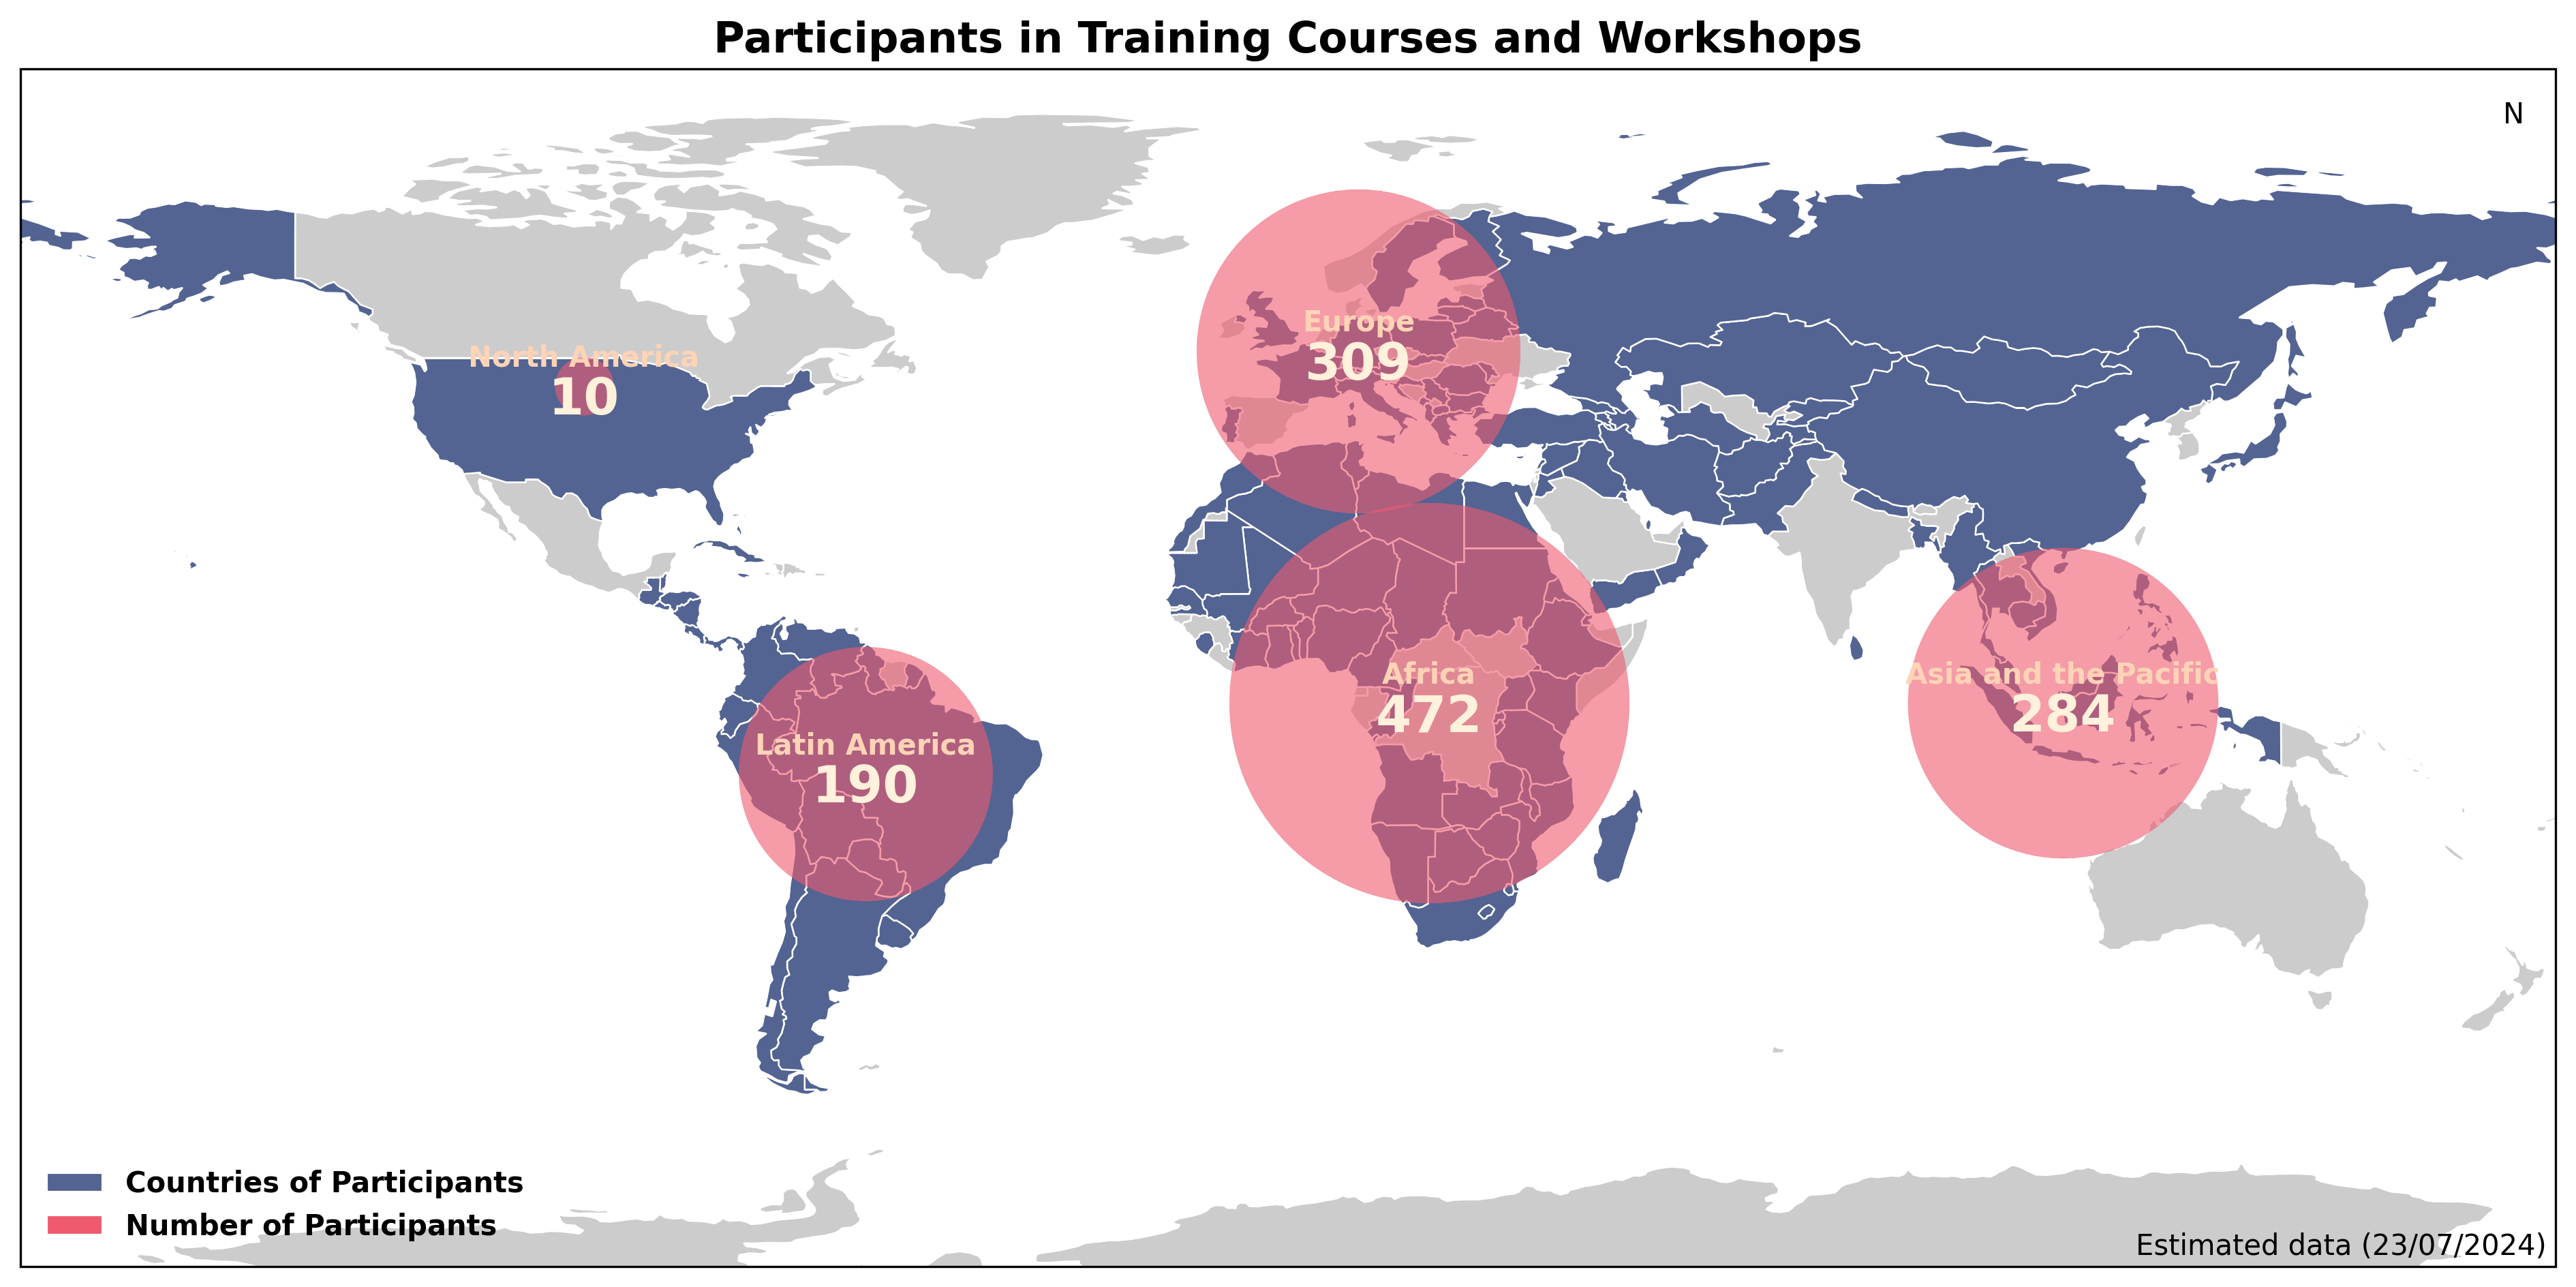

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch, Circle
from matplotlib.font_manager import FontProperties
import re
import pycountry

# 设置字体
font_arial = FontProperties(fname='/usr/share/fonts/truetype/arial.ttf', weight='bold')
font_helvetica = FontProperties(fname='/usr/share/fonts/truetype/helvetica.ttf', weight='bold')

# 读取新的Excel文件
file_path = '/content/drive/MyDrive/data/20240722 ZODIAC participants in trainings v2.xlsx'
df = pd.read_excel(file_path)

# 标准化国家名称
def standardize_country_name(name):
    # 将非字符串类型转换为字符串
    name = str(name)
    # 去掉括号及其内容
    name = re.sub(r'\(.*?\)', '', name).strip()
    # 手动修正一些常见的国家名称变体
    corrections = {
        'Cote d\'Ivoire': 'Ivory Coast',
        'United States of America': 'United States',
        'Eswatini': 'Swaziland',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Russian Federation': 'Russia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Republic of Moldova': 'Moldova',
        'Congo (the Democratic Republic of the)': 'Democratic Republic of the Congo',
        'Lao People\'s Democratic Republic (the)': 'Laos',
        'Micronesia (Federated States of)': 'Micronesia',
        'Republic of Korea': 'South Korea',
        'Brunei Darussalam': 'Brunei',
        'Palestine, State of': 'Palestine',
        'Antigua and Barbuda': 'Antigua and Barbuda',
        'Bahamas (the)': 'Bahamas',
        'Saint Vincent and Grenadines': 'Saint Vincent and the Grenadines',
        'Central African Republic (the)': 'Central African Republic',
        'Democratic Republic of Congo': 'Congo, Democratic Republic of the'
    }
    # 使用pycountry标准化名称
    try:
        standardized_name = pycountry.countries.lookup(name).name
    except LookupError:
        standardized_name = corrections.get(name, name)
    return standardized_name

df['Standardized Country Name'] = df['Country Name'].apply(standardize_country_name)

# 获取包含机构的国家列表
countries_with_institutions = df['Standardized Country Name'].unique()

# 加载国家的自然地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 在世界GeoDataFrame中创建一个新列存储颜色
world['color'] = default_country_color = '#cccccc'

# 更新包含机构的国家的颜色
world['name'] = world['name'].apply(standardize_country_name)
highlighted_country_color = '#536493'
world.loc[world['name'].isin(countries_with_institutions), 'color'] = highlighted_country_color

# 检查哪些国家没有被正确着色
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries in map data before replacements:", missing_countries)

# 手动添加缺失国家到GeoDataFrame
country_replacements = {
    'Ivory Coast': 'Côte d\'Ivoire',
    'Swaziland': 'Eswatini',
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'Bolivia': 'Bolivia, Plurinational State of',
    'Moldova': 'Moldova, Republic of',
    'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
    'Laos': 'Lao People\'s Democratic Republic',
    'Micronesia': 'Micronesia, Federated States of',
    'South Korea': 'Korea, Republic of',
    'Brunei': 'Brunei Darussalam',
    'Palestine': 'Palestine, State of',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Bahamas': 'Bahamas',
    'Bosnia': 'Bosnia and Herzegovina',
    'Comoros': 'Comoros',
    'Congo': 'Congo',
    'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Seychelles': 'Seychelles',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Bahrain': 'Bahrain',
    'Malta': 'Malta',
    'Central African Republic': 'Central African Republic',
    'Marshall Islands': 'Marshall Islands',
    'Singapore': 'Singapore',
    'Russian Federation': 'Russia',
    'Mauritius': 'Mauritius',
    'Dominican Republic': 'Dominican Republic',
    'Saint Lucia': 'Saint Lucia',
    'Taiwan': 'Taiwan'
}

# 更新world GeoDataFrame中的国家颜色
for missing in missing_countries:
    replacement = country_replacements.get(missing, None)
    if replacement:
        world.loc[world['name'] == replacement, 'color'] = highlighted_country_color

# 重新检查哪些国家仍然缺失
missing_countries = set(countries_with_institutions) - set(world['name'])
print("Missing countries after replacements:", missing_countries)

# 列出所有在数据中存在但在地图中缺失的国家
unmatched_countries = [country for country in countries_with_institutions if country not in world['name'].values]
print("Unmatched countries:", unmatched_countries)

# 手动添加台湾的标记
taiwan_geometry = world.loc[world['name'] == 'Taiwan', 'geometry']
if not taiwan_geometry.empty:
    world.loc[world['name'] == 'Taiwan', 'color'] = highlighted_country_color
else:
    print("Taiwan is not present in the naturalearth_lowres dataset")

# 计算每个区域的机构数量
region_counts = df['Iaea Region Name'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# 定义每个区域的坐标
region_coords = {
    'Africa': (20, 0),
    'Asia and the Pacific': (110, 0),
    'Europe': (10, 50),
    'Latin America': (-60, -10),
    'North America': (-100, 45)
}

# 定义气泡和文本颜色
bubble_color = '#EF5A6F'
text_color = '#FFD3B6'
text_color2 = '#FFF1DB'

# 创建一个新的投影图
fig, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# 使用指定颜色绘制国家
for _, row in world.iterrows():
    ax.add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=row['color'], edgecolor='white', linewidth=0.3)

# 绘制基础世界地图，使用白色海岸线和边界，填充陆地为浅色
ax.add_feature(cfeature.LAND, facecolor=default_country_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.6)

# 绘制每个区域的气泡
for (region, (x, y)) in region_coords.items():
    count = region_counts.loc[region_counts['Region'] == region, 'Count'].values[0] if region in region_counts['Region'].values else 0
    ax.scatter(x, y, s=count*42, color=bubble_color, transform=ccrs.PlateCarree(), alpha=0.6, edgecolors=bubble_color, linewidth=0.1, zorder=5)

    # 添加区域名称
    ax.text(x, y + 4, region, color=text_color, fontsize=10, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))
    # 添加数量
    ax.text(x, y - 2, f'{count}', color=text_color2, fontsize=18, ha='center', va='center', weight='bold', transform=ccrs.PlateCarree(), zorder=6, fontproperties=FontProperties(weight='bold'))

# 设置显示范围以聚焦北半球
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())

# 添加图例
legend_elements = [
    Patch(facecolor=highlighted_country_color, edgecolor='white', label='Countries of Participants'),
    Circle((0, 0), radius=10, facecolor=bubble_color, edgecolor='white', label='Number of Participants')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize='large', frameon=False, prop=FontProperties(weight='bold'))

# 添加专业北箭头
north_arrow = AnchoredText('N', loc='upper right', frameon=False, pad=0.6, borderpad=0.5)
ax.add_artist(north_arrow)
arrow_props = dict(facecolor='white', edgecolor='white', width=6, headwidth=12, headlength=10)
ax.annotate('', xy=(0.97, 0.97), xytext=(0.97, 0.92),
            arrowprops=arrow_props, xycoords='axes fraction', ha='center', va='center')

# 标题和标签
plt.title('Participants in Training Courses and Workshops', size=15, weight='bold')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# 添加更新日期
update_text = 'Estimated data (23/07/2024) '
ax.text(1, 0.01, update_text, transform=ax.transAxes, fontsize=10, ha='right')

# 保存图片
plt.savefig('/content/drive/MyDrive/figures/locations_of_participants_ZODIAC.png', dpi=300, bbox_inches='tight')

# 显示绘图
plt.show()



In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px

# 加载数据
file_path = '/content/drive/MyDrive/data/20240722 All ZODIAC events.xlsx'
df = pd.read_excel(file_path)

# 数据预处理
df['Ev. Start Date'] = pd.to_datetime(df['Ev. Start Date'])
df['Ev. End Date'] = pd.to_datetime(df['Ev. End Date'])
df['Duration'] = (df['Ev. End Date'] - df['Ev. Start Date']).dt.days + 1

# 创建甘特图
fig = px.timeline(df, x_start="Ev. Start Date", x_end="Ev. End Date", y="Ev. Type", color="Ev. Type", title='Event Timeline by Type',
                  hover_data=['Ev. Start Date', 'Ev. End Date', 'Duration'])

# 更新图表的布局
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Event Type",
    legend_title="Event Type",
    hoverlabel_align = 'right'
)

# 显示图表
fig.show()


In [ ]:


# 导入库
import pandas as pd
import plotly.express as px

# 加载数据
file_path = '/content/drive/MyDrive/data/20240722 All ZODIAC events.xlsx'
df = pd.read_excel(file_path)

# 数据预处理
df['Ev. Start Date'] = pd.to_datetime(df['Ev. Start Date'])
df['Ev. End Date'] = pd.to_datetime(df['Ev. End Date'])
df['Duration'] = (df['Ev. End Date'] - df['Ev. Start Date']).dt.days + 1

# 定义自定义颜色
custom_colors = {
    'Consultants Meeting': '#1C1678',
    'Expert Mission': '#8576FF',
    'Fellowship': '#7BC9FF',
    'Meeting': '#A3FFD6',
    'Regional Training Course': '#37B7C3',
    'Workshop': '#667BC6',
}

# 创建甘特图
fig = px.timeline(df, x_start="Ev. Start Date", x_end="Ev. End Date", y="Ev. Type", color="Ev. Type", title='Event Timeline by Type',
                  hover_data=['Ev. Start Date', 'Ev. End Date', 'Duration'],
                  color_discrete_map=custom_colors)

# 更新图表的布局
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Event Type",
    legend_title="Event Type",
    hoverlabel_align='right'
)

# 显示图表
fig.show()

# 保存图表为高清PNG图片
fig.write_image("/content/drive/MyDrive/figures/ZODIAC_events_gantt_chart.png", scale=2, width=1400, height=800)



ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
# 安装必要的库
!pip install -U kaleido

In [ ]:
import pandas as pd
import plotly.express as px

# 加载数据
file_path = '/content/drive/MyDrive/data/20240722 All ZODIAC events.xlsx'  # 修改文件路径
df = pd.read_excel(file_path)

# 数据预处理
df['Ev. Year'] = df['Ev. Start Date'].dt.year

# 按年份和事件类型统计事件数量
event_count = df.groupby(['Ev. Year', 'Ev. Type']).size().reset_index(name='Count')

# 定义自定义颜色方案
custom_colors = {
    'Regional Training Course': '#37B7C3',
    'Meeting': '#A3FFD6',
    'Workshop': '#667BC6',
    'Expert Mission': '#8576FF',
    'Fellowship': '#7BC9FF',
    'Consultants Meeting': '#1C1678'
}

# 创建条形图
fig_bar = px.bar(event_count, x='Ev. Year', y='Count', color='Ev. Type', barmode='group',
                 title='Number of Events by Year and Type',
                 labels={'Ev. Year': 'Year', 'Count': 'Number of Events', 'Ev. Type': 'Event Type'},
                 color_discrete_map=custom_colors,
                 hover_data=['Ev. Type', 'Count'])

# 更新图表的布局
fig_bar.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Events",
    legend_title="Event Type",
    hoverlabel_align='right',
    template='plotly_white'  # 选择一个高档的模板
)

# 保存条形图
#fig_bar.write_image("/mnt/data/event_bar_chart.png", scale=2, width=700, height=500)

# 创建环形图
event_type_count = df['Ev. Type'].value_counts().reset_index()
event_type_count.columns = ['Ev. Type', 'Count']

fig = px.pie(event_count,
             names='Ev. Type',
             values='Count',
             color='Ev. Type',
             color_discrete_map=custom_colors,
             hole=0.4)

# 更新环形图的布局
fig_pie.update_layout(
    annotations=[dict(text='Event Types', x=0.5, y=0.5, font_size=20, showarrow=False)],
    template='plotly_white'  # 选择一个高档的模板
)


# 显示图表
fig_bar.show()
fig_pie.show()




In [ ]:
# 安装必要的库
!pip install pandas plotly openpyxl

In [ ]:
# 导入库
import pandas as pd
import plotly.express as px

# 加载数据
file_path = '/content/drive/MyDrive/data/20240722 All ZODIAC events.xlsx'  # 修改文件路径
df = pd.read_excel(file_path)

# 数据预处理
df['Ev. Year'] = df['Ev. Start Date'].dt.year

# 按年份和事件类型统计事件数量
event_count = df.groupby(['Ev. Year', 'Ev. Type']).size().reset_index(name='Count')

# 定义自定义颜色
custom_colors = {
    'Consultants Meeting': '#1C1678',
    'Expert Mission': '#8576FF',
    'Fellowship': '#7BC9FF',
    'Meeting': '#A3FFD6',
    'Regional Training Course': '#37B7C3',
    'Workshop': '#667BC6',
    # 添加更多颜色定义如果有的话
}

# 创建环形图
fig = px.pie(event_count,
             names='Ev. Type',
             values='Count',
             color='Ev. Type',
             color_discrete_map=custom_colors,
             hole=0.4)

# 更新环形图的布局
fig.update_layout(
    annotations=[dict(text='Event Types', x=0.5, y=0.5, font_size=20, showarrow=False)],
    template='plotly_white',  # 选择一个高档的模板
    plot_bgcolor='rgba(0,0,0,0)',  # 设置图表背景为透明
    paper_bgcolor='rgba(0,0,0,0)',  # 设置纸张背景为透明
    font=dict(
        size=18  # 设置全局字体大小
    ),
    legend=dict(
        font=dict(
            size=16  # 设置图例字体大小
        )
    )
)

# 保存环形图
#fig.write_image("/content/drive/MyDrive/figures/ZODIAC_events_pie_chart.png", scale=2, width=700, height=500)

# 显示图表
fig.show()

